# Homework2

Please upload to Moodle a .zip archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a requirements.txt file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages in one go, by using "pip install -r requirements.txt".

Please name your .zip archive using your full name and student id as follows - *Firstname_Lastname_12345678_COMP47350_Homework2.zip*. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments for the code you write and justifications for the decisions you make. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Moodle.

Your code and analysis is like a story that awaits to be read, make it a nice story please.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Sunday, 28 April, 2019, midnight.** 

## Exercises

This homework focuses on building and evaluating prediction models for a particular problem and dataset.
The problem and data come from a credit scoring company concerned with reducing credit repayment risk. The company wants to use the data collected about their customers to build a data analytics solution for credit risk prediction.
The fundamental task is to use the information about the applicant in their credit report to predict whether they will repay their credit within 2 years. The target variable to predict is a binary variable called RiskPerformance. The value “Bad” indicates that a consumer was 90 days past due or worse at least once over a period of 24 months from when the credit account was opened. The value “Good” indicates that they have made their payments without ever being more than 90 days overdue. The dataset we work with is a sample of the data used in this data challenge: https://community.fico.com/s/explainable-machine-learning-challenge?tabset-3158a=2

Our goal in this homework is to work with the data to build and evaluate prediction models that capture the relationship between the descriptive features and the target feature 'RiskPerformance'. We use the same dataset allocated to you in Homework1 (you can use your cleaned/prepared CSV from Homework1 or, start from the raw dataset, clean it according to concepts covered in the lectures/labs, then use it for training prediction models).
 
There are 5 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 25% shown as [25].


(1). [25] **Data Understanding and Prep:** Exploring relationships between feature pairs and selecting/transforming promising features based on a training set.
    - (1.1) Randomly shuffle the rows of your dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside. 
    - (1.2) On the training set:
        - Plot the correlations between all the continuous features. Discuss what you see in these plots.
        - For each continuous feature, plot its interaction with the target feature (a plot for each pair of continuous feature and target feature). Discuss what you observe from these plots, e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising (if any). Justify your choices.
        - For each categorical feature, plot its pairwise interaction with the target feature. Discuss what knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising (if any). Justify your choices.
      
    
(2). [15] **Predictive Modeling:** Linear Regression.  
    - (2.1) On the training set, train a linear regression model to predict the target feature, using only the descriptive features selected in exercise (1) above. 
    - (2.2) Print the coefficients learned by the model and discuss their role in the model (e.g., interpret the model).    
    - (2.3) Print the predicted target feature value for the first 100 training examples. Threshold the predicted target feature value given by the linear regression model at 0.5, to get the predicted class for each example. Print the predicted class for the first 100 examples. Print the classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.
    - (2.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).
    
(3). [15] **Predictive Modeling:** Logistic Regression.  
    - (3.1) On the training set, train a logistic regression model to predict the target feature, using the descriptive features selected in exercise (1) above.   
    - (3.2) Print the coefficients learned by the model and discuss their role in the model (e.g., interpret the model).    
    - (3.3) Print the predicted target feature value for the first 100 training examples. Print the predicted class for the first 100 examples. Print the classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.
    - (3.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).
    
(4). [20] **Predictive Modeling:** Random Forest.  
    - (3.1) On the training set, train a random forest model to predict the target feature, using the descriptive features selected in exercise (1) above.   
    - (3.2) Can you interpret the random forest model? Discuss any knowledge you can gain for the working of this model.   
    - (3.3) Print the predicted target feature value for the first 100 training examples. Print the predicted class for the first 100 examples. Print the classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.
    - (3.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset) and with the out-of-sample error.
    
(4). [25] **Improving Predictive Models.**
    - (4.1) Which model of the ones trained above performs better at predicting the target feature? Is it more accurate than a simple model that always predicts the majority class (i.e., if RiskPerformance=0 is the majority class in your dataset, the simple model always predicts 0 for the target feature)? Justify your answers.
    - (4.2) Summarise your understanding of the problem and of your predictive modeling results so far. Can you think of any new ideas to improve the best model so far (e.g., by using furher data prep such as: feature selection, feature re-scaling, creating new features, combining models, or using other knowledge)? Please show how your ideas actually work in practice, by training and evaluating your proposed models. Summarise your findings so far.

In [144]:
# Library Imports.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns

# Allows plots to appear directly in the notebook.
%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1 - Data Understanding and Prep
Exploring relationships between feature pairs and selecting/transforming promising features based on a training set.

NOTE: I will use the cleaned dataset from homework 1

In [5]:
# Reading from a csv file
df = pd.read_csv('CreditRisk_final_18205940.csv')
df.head(2)
# df.dtypes

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                  69.0                   43.0   
1             Bad                  75.0                  410.0   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                        8.0            22.0                    7.0   
1                        2.0           121.0                   37.0   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                          0.0                          0.0   
1                          1.0                          1.0   

   PercentTradesNeverDelq MSinceMostRecentDelq           ...            \
0                   100.0     No delinquencies           ...             
1                    83.0         10-19 months           ...             

  NumInqLast6M NetFractionRevolvingBurden  NumRevolvingTradesWBalance  \
0          1.0                       58.0                         3.0   
1          1.0                       34.0                         7.0   

   NumInstallTradesWBalance  NumBank2NatlTradesWHighUtilization  \
0                       3.0                                 1.0   
1                       1.0                                 1.0   

  PercentTradesWBalance  PrevDelq    RiskEst  TradesDelq  \
0                  86.0        No  High Risk          No   
1                  53.0       Yes   Low Risk         Yes   

   RevBalance/CreditLimit  
0                    High  
1                    High  

[2 rows x 26 columns]

#### (1.1) Randomly shuffle the rows of your dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside.

In [956]:
#shuffle and split the dataset
train, test = train_test_split(df, test_size=0.3, random_state=0)

In [859]:
# #prepare features. y is the target feature, x contains all the other features 
x_train = train.drop(columns=['RiskPerformance'])
y_train = train.RiskPerformance
x_test = test.drop(columns=['RiskPerformance'])
y_test = test.RiskPerformance

In [860]:
train.dtypes

RiskPerformance                        object
ExternalRiskEstimate                  float64
MSinceOldestTradeOpen                 float64
MSinceMostRecentTradeOpen             float64
AverageMInFile                        float64
NumSatisfactoryTrades                 float64
NumTrades60Ever2DerogPubRec           float64
NumTrades90Ever2DerogPubRec           float64
PercentTradesNeverDelq                float64
MSinceMostRecentDelq                   object
MaxDelq2PublicRecLast12M               object
MaxDelqEver                            object
NumTotalTrades                        float64
NumTradesOpeninLast12M                float64
PercentInstallTrades                  float64
MSinceMostRecentInqexcl7days           object
NumInqLast6M                          float64
NetFractionRevolvingBurden            float64
NumRevolvingTradesWBalance            float64
NumInstallTradesWBalance              float64
NumBank2NatlTradesWHighUtilization    float64
PercentTradesWBalance             

In [957]:
print('size of original dataframe: ', len(df))
print('size of training dataframe: ',len(train), '=', round((len(train)/len(df))*100), '%')
print('size of testing dataframe: ',len(test), ' =', round((len(test)/len(df))*100), '%\n')
print('target feature % in training data: \n', round(train['RiskPerformance'].value_counts(normalize=True) * 100))

size of original dataframe:  941
size of training dataframe:  658 = 70 %
size of testing dataframe:  283  = 30 %

target feature % in training data: 
 Bad     56.0
Good    44.0
Name: RiskPerformance, dtype: float64


#### (1.2) On the training set:
#### Plot the correlations between all the continuous features. Discuss what you see in these plots.  

The training dataset includes 17 continuous features, in order to analyse in more details their relationships, we perform the following steps:
- create a complete scatter_matrix with all the features to have a first impression of possible relations 
- create a table containing the continuous correlation values for every pair, where values close to 1 represent a strong correlation 

In [862]:
# create dataset only with continuos features
train_continuous = train.select_dtypes(['float64'])
# create dataset only with cateforical features
train_categorical = train.select_dtypes(['object'])

In [863]:
train_categorical.columns

Index(['RiskPerformance', 'MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M',
       'MaxDelqEver', 'MSinceMostRecentInqexcl7days', 'PrevDelq', 'RiskEst',
       'TradesDelq', 'RevBalance/CreditLimit'],
      dtype='object')

In [864]:
train_continuous.columns

Index(['ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'NumTotalTrades', 'NumTradesOpeninLast12M',
       'PercentInstallTrades', 'NumInqLast6M', 'NetFractionRevolvingBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance'],
      dtype='object')

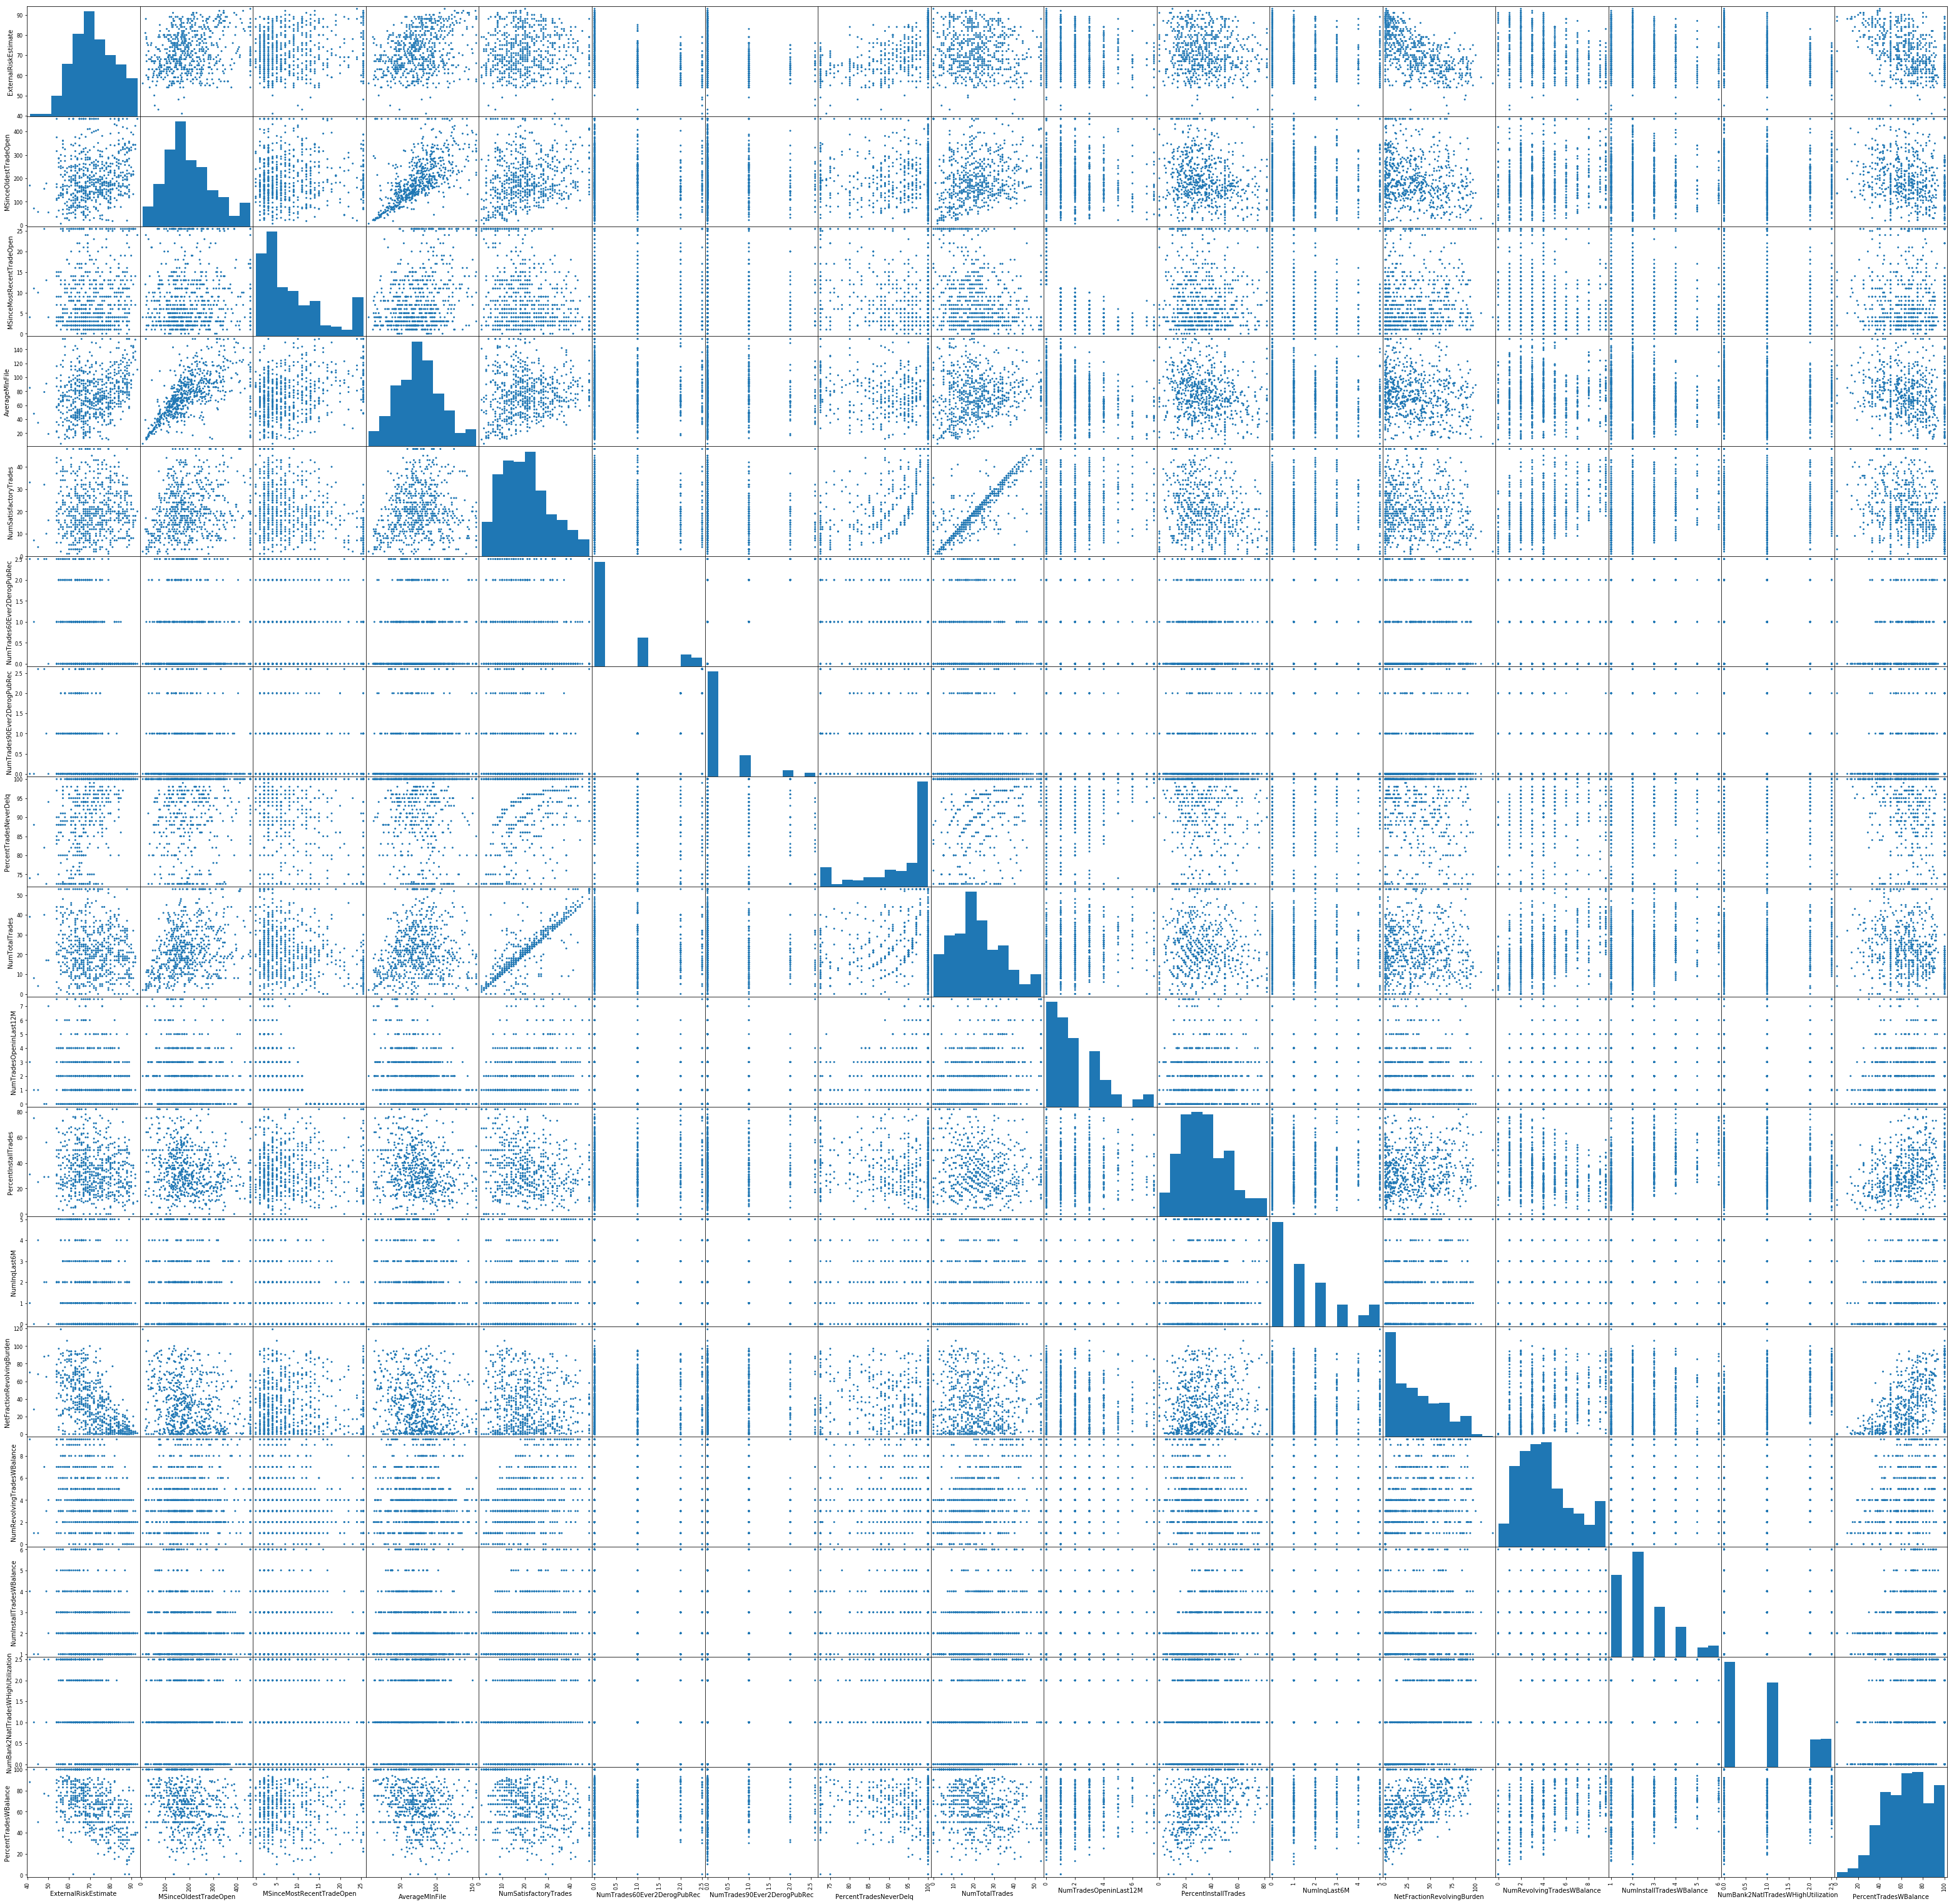

In [865]:
#scatter_matrix with all the features to have a first impression of possible relations
from pandas.plotting import scatter_matrix

scatter_matrix(train_continuous, alpha = 1, figsize=(55,55), diagonal ='hist')
plt.show()

In [866]:
# create a table containing the correlation values
corr = train_continuous.corr()
corr.style.background_gradient(cmap='viridis').set_precision(2)

The following table contains the observed relationship between continuous features and the corresponding correlation values (considered correlation values < -0.5 and > 0.5. 

| Continuous Feature     | Continuous Feature   | Correlation Value       |
|-------------------------|----------------------|------------------------   |
| NumTotalTrades          | NumSatisfactoryTrades | 0.84              |
| NumTrades90Ever/DerogPubRec          | NumTrades60Ever/DerogPubRec | 0.82              |
| NumBank/NatlTradesWHighUtilization          | NetFractionRevolvingBurden | 0.65              |
| PercentTradesWBalance          | NetFractionRevolvingBurden | 0.65              |
| AverageMInFile          | MSinceOldestTradeOpen | 0.58              |
| PercentTradesNeverDelq          | ExternalRiskEstimate | 0.53              |
| NumBank2NatlTradesWHighUtilization | ExternalRiskEstimate | - 0.51 |
|PercentTradesNeverDelq | NumTrades60Ever2DerogPubRec | - 0.59 |
|NetFractionRevolvingBurden | ExternalRiskEstimate | - 0.61 |
|NumTradesOpeninLast12M | MSinceMostRecentTradeOpen | - 0.65 |

The study of these relationships indicates a high correlation (> 0.8) only between a limited number of features:

- <i>**NumTrades90Ever/DerogPubRec**</i> and <i>**NumTrades60Ever/DerogPubRec**</i> as they represent the same feature over a different period of time. 
-  <i>**NumTotalTrades**</i> and <i>**NumSatisfactoryTrades**</i> as they both represent a number of trades. It's however interesting to notice that most of the trades were satisfacory, a "satisfactory trade" is one where the borrower has paid on time as agreed.

While the other features show less relevant correlation values. Therefore, at this stage we don't see any specific trend in our dataset.

#### (1.2) On the training set:
    
#### For each continuous feature, plot its interaction with the target feature (a plot for each pair of continuous feature and target feature). Discuss what you observe from these plots, e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising (if any). Justify your choices.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


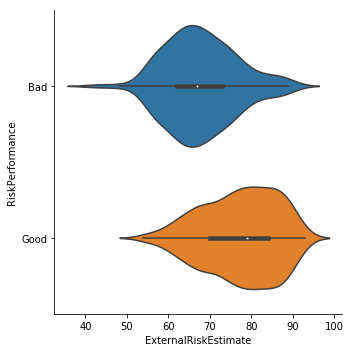

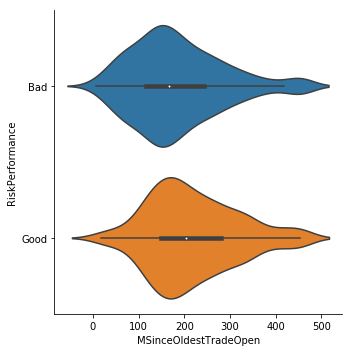

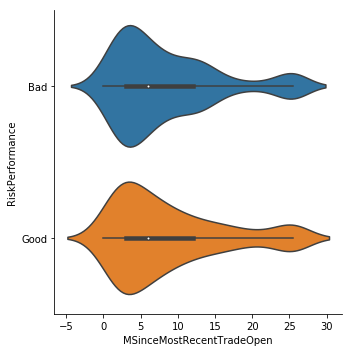

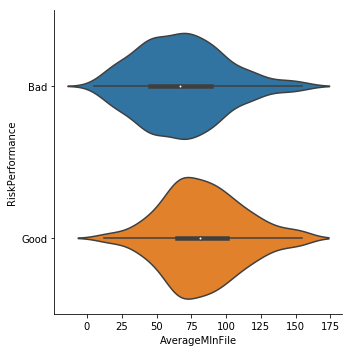

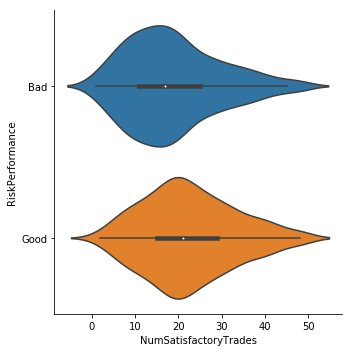

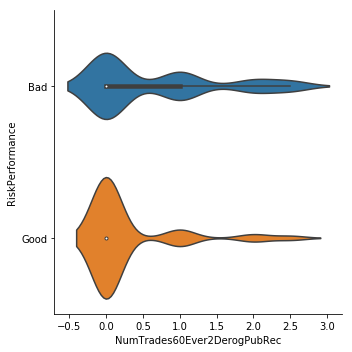

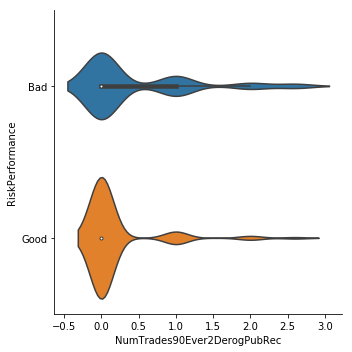

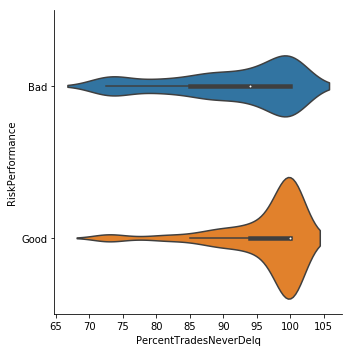

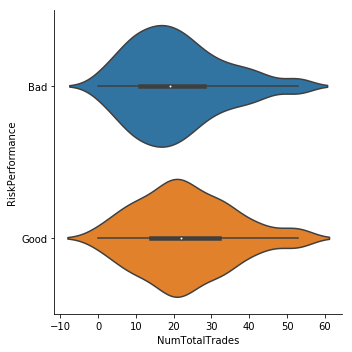

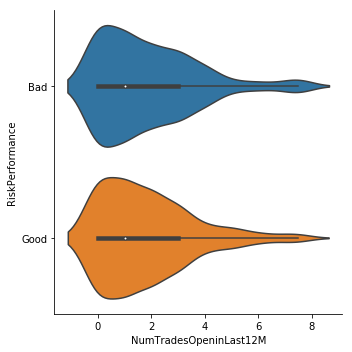

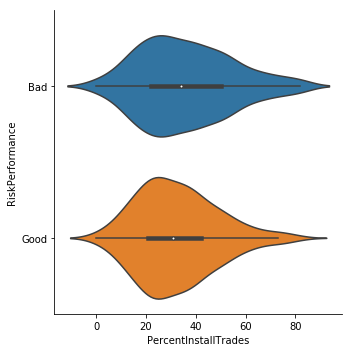

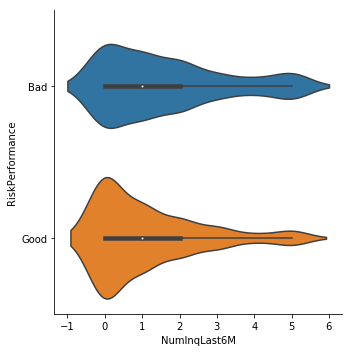

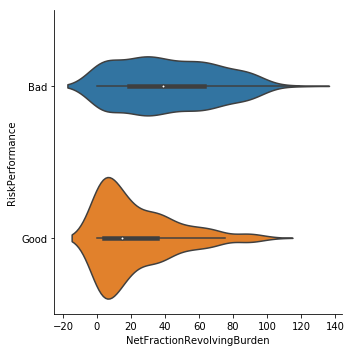

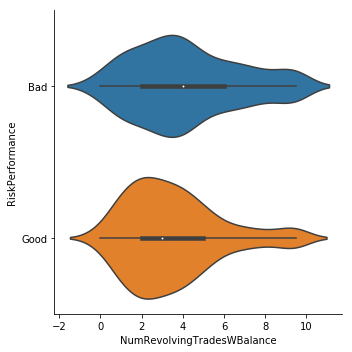

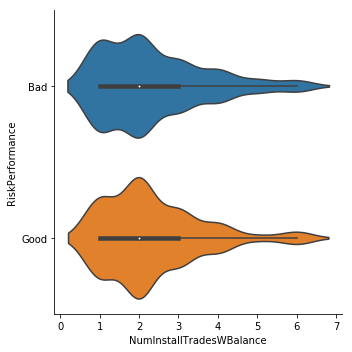

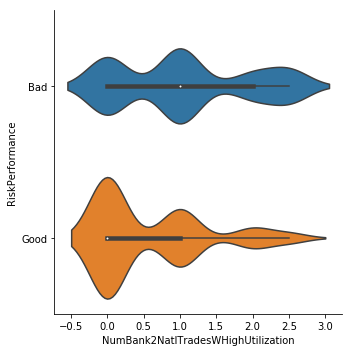

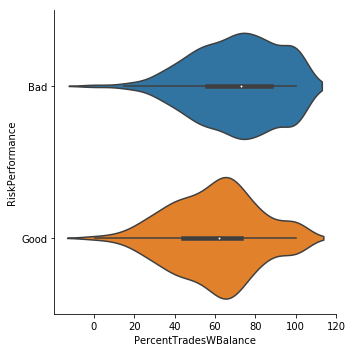

In [867]:
for elem in train_continuous.columns:
    sns.catplot(x=elem, y='RiskPerformance',kind="violin", data=train)


The graphs shows, in general, a similar distribution of data for both values of the target outcome.
Some exceptions are observed in these features:
- <i>**ExternalRiskEstimate**</i>: 'Good' instances tend to have a higher value
- <i>**NetFractionRevolvingBurden**</i>: 'Good' instances tend to have more values near 0 while 'Bad' instances have a larger range of values above 0
- <i>**NumBank/NatlTradesWHighUtilization**</i>: 'Good' instances tend to have more values at 0 or 1, 'Bad' instances have a larger number of values above 0
- <i>**PercentTradesNeverDelq**</i>: 'Good' instances have most of the values at 100%, 'Bad' instance show more values below 100%
- <i>**PercentTradesWBalance**</i>: 'Bad' instances have a larger number of values near 100%

Considering what described above, this analysis indicates that there are no continuous features that are strongly related to the target feature <i>**RiskPerformance**</i>.

At this stage is therefore difficult to select a subset of features that are promosing. 

In order to evaluate in more details if a subset of features can be selected, we will use the sklean module `feature_selection` (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) to find the mutual information (MI), or information gain, to measure the dependancy between the features.

#### Mutual Information (or Information Gain)
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [868]:
y_train = train.RiskPerformance

from sklearn.feature_selection import mutual_info_classif
mutual_information = mutual_info_classif(train_continuous, y_train)

mutual_information

array([0.11443905, 0.01213438, 0.03477656, 0.01497287, 0.        ,
       0.07380602, 0.0028602 , 0.        , 0.03624878, 0.        ,
       0.        , 0.00670837, 0.06592187, 0.00885278, 0.        ,
       0.07668294, 0.07459062])

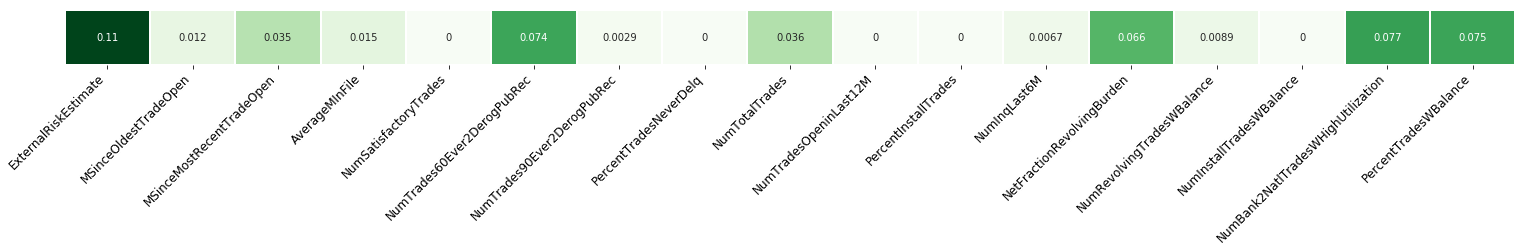

In [869]:
plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Greens', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(train_continuous.columns, rotation=45, ha='right', fontsize=12)
plt.gcf().subplots_adjust(wspace=0.2)

The analysis shows that some features show a higher dependency (higher value and darker color) and these are the ones we discussed earlier:

- <i>**ExternalRiskEstimate**</i>
- <i>**NetFractionRevolvingBurden**</i>
- <i>**NumBank/NatlTradesWHighUtilization**</i>
- <i>**PercentTradesNeverDelq**</i>
- <i>**PercentTradesWBalance**</i>

with the addition of <i>**NumSatisfactoryTrades**</i>.

We can also observe that some features show a value of 0 which indicates no dependency:

- <i>**NumTotalTrades**</i>
- <i>**NumInstallTradesWBalance**</i>

### Option 1
We decide to extract a subset containing only the features that show a dependency value > 0.02.  


### Option 2  (discussed in part 5)
Model based feature selection: we keep all the features to create the model and we leave at a later stage the decision to drop any feature. 

In [870]:
### Option 1
train_continuous_opt1=train_continuous.drop(columns=['MSinceOldestTradeOpen','MSinceMostRecentTradeOpen', \
                                                'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', \
                                                'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades',\
                                               'NumInstallTradesWBalance'])
train_continuous_opt1.columns

Index(['ExternalRiskEstimate', 'AverageMInFile', 'NumSatisfactoryTrades',
       'PercentTradesNeverDelq', 'NumInqLast6M', 'NetFractionRevolvingBurden',
       'NumRevolvingTradesWBalance', 'NumBank2NatlTradesWHighUtilization',
       'PercentTradesWBalance'],
      dtype='object')

In [215]:
### Option 2 
train_continuous_opt2 = train_continuous

#### (1.2) On the training set:
    
#### For each categorical feature, plot its pairwise interaction with the target feature. Discuss what knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising (if any). Justify your choices.

In [871]:
train_categorical.columns

Index(['RiskPerformance', 'MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M',
       'MaxDelqEver', 'MSinceMostRecentInqexcl7days', 'PrevDelq', 'RiskEst',
       'TradesDelq', 'RevBalance/CreditLimit'],
      dtype='object')

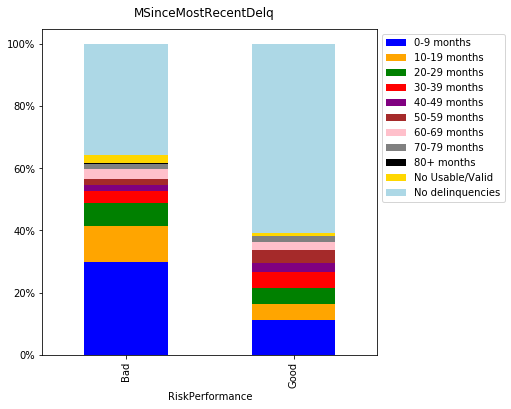

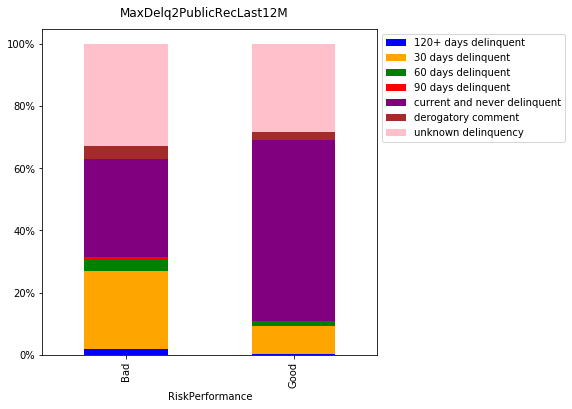

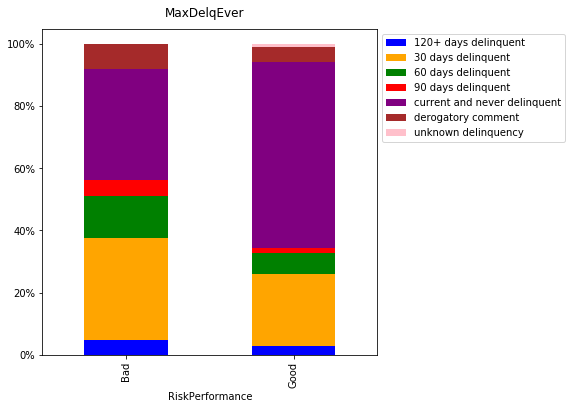

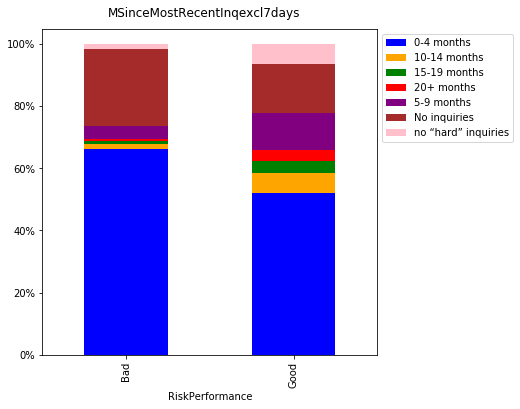

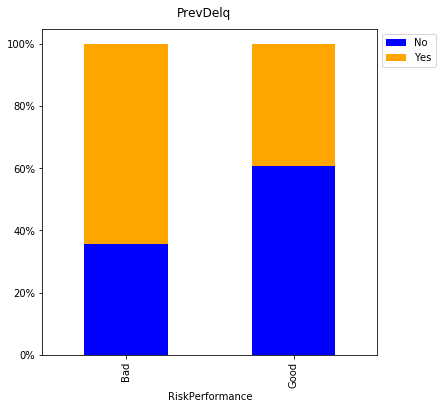

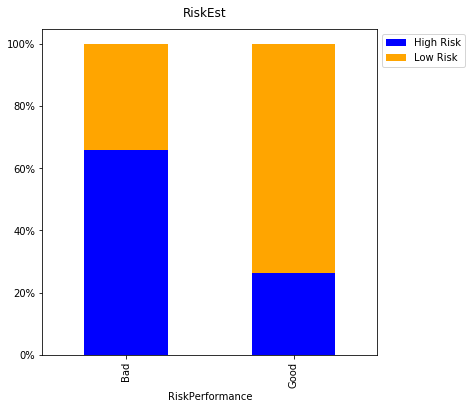

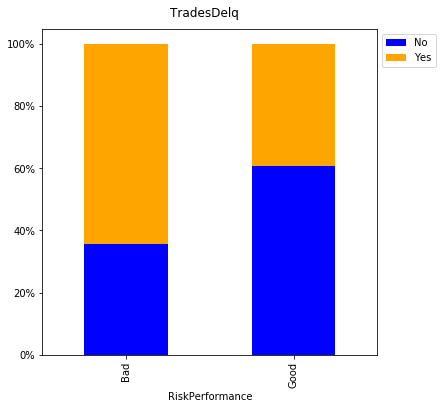

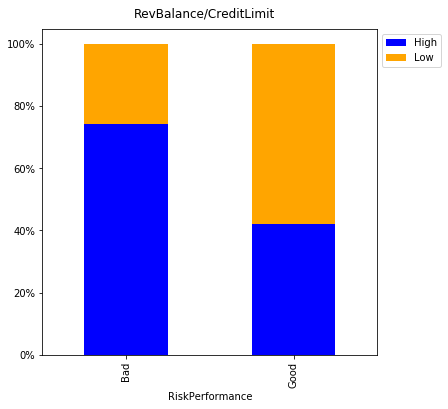

In [872]:
x_train_categorical = train_categorical.drop(columns=['RiskPerformance'])
y_train = train_categorical.RiskPerformance


for elem in x_train_categorical.columns:
    train_categorical.groupby(['RiskPerformance',elem]).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', figsize=(6,6),\
                                                    color=['blue','orange', 'green', 'red', 'purple','brown', 'pink', 'grey', 'black', 'gold', 'lightblue'],\
                                                    stacked=True).legend(bbox_to_anchor=(1, 1))

    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.suptitle(elem, x=0.5, y=0.93)
    plt.show()

The stacked bar plots show on the X axis the taget outcome 'Good' or 'Bad' and on the Y axis the total percentage of values of the other categorical feature observed. The legend on right hand side of the figure shows, in different colours, the different values for the feature. With this type of graph it's easy to observe that certain values prevale where the target is 'Good' and some other are higher when the target is 'Bad'.

We'll see each graph in more detail:

in the graph compares <i>**RiskPerformance**</i> & <i>**MSinceMostRecentDelq**</i> we observe that:
- the values no delinquencies (light-blue) appears with a frequency of about 60% in the 'Good' instances while, in the 'Bad' instances of the dataset, it represents only about 40% of the values 
- the 'Bad' instances have a relevant amount of values, about 40%, that refer to delinquencies that happend in the last 20 months while these values correspond to less than 20% in the 'Good' instances
- a common trend that can be recognized is that there is a decrease in frequency towards an increasing number of months since the last delinquency, this indicates that for most of the instances associated with a delinquency, these negative events happend recently.

in the graph that compares <i>**RiskPerformance**</i> & <i>**MaxDelq/PublicRecLast12M**</i> we observe that:
- current and never deliquent (purple) has a higher percentage in the 'Good' instances of the dataset
- all the other values have a higher percentage in the 'Bad' instances of the dataset

in the graph that compares <i>**RiskPerformance**</i> & <i>**MaxDelqEver**</i> we observe that:
- current and never deliquent (purle) and unknown deliquency (pink) have a higher percentage in the 'Good' instances of the dataset
- all the values that indicate a negative status (derogatory comment (brown), 90 days delinquent (red), 60 days delinquent (green), 30 days delinquent (orange) and 120+ days delinquent (blue)), have a higher percentage in the 'Bad' instances of the dataset

in the graph that compares <i>**RiskPerformance**</i> & <i>**MSinceMostRecentInqexcl7days**</i> and we observe that:
- for both 'Good' and 'Bad' instances, the highest percentages of values refer to a recent inquiry that happend in the last 4 months. However, this percentage is greater for the 'Bad' intances were it covers about 65% of the data.
- it's interesting to observe that, contrary to what expected, the 'Bad' instances have a higher percentage of values labeled as 'No inquiries' (brown).
- the 'Good' instances show a greater percentage of inquiries that happened between the last 5-9 months, but also show a larger amount of values labeled as no "hard" inquiries, i.e. these instances were not actively searching for credit


The last four graphs plot the target value and the four additional features created in Homework 1

<i>**PrevDelq**</i> (Previous Delinquencies) that, based on the values of the features <i>**MaxDelqEver**</i>, <i>**MaxDelq2PublicRecLast12M**</i> and <i>**MSinceMostRecentDelq**</i>, flags with a 'Yes' and instance that had a previous delinquecy indicated by any of the features, and with a 'No' an instance that doesn't show any illegal behaviour in any feature.

<i>**RiskEst**</i>: Risk Estimate, derived from <i>**ExternalRiskEstimate**</i>, where the flag 'High Risk' (<=70) refers to instances with a bad risk value and the flag 'Low Risk' refers to good risk values.

<i>**TradesDelq**</i>: Trades Deliquent, derived from <i>**PercentTradesNeverDelq**</i>, where the flag 'No' (100%) refers to instances with no deliquent trades and the flag 'Yes' (<100%) referst to instance that had deliquent trandes.

<i>**RevBalance/CreditLimit**</i>: revolving balance divided by credit limit, derived from <i>**NetFractionRevolvingBurden**</i>, where the flag 'High' (>=20) indicates bad behaviour and the flag 'Low' (<20) indicates good behaviour.

in the graph that compares <i>**RiskPerformance**</i> & <i>**PrevDelq**</i> we observe that:
- more than 60% of the instances flagged as 'Bad' show and history of delinquency while more than 60% of the instances flagged as 'Good' don't show any previous delinquency.

in the graphs that compare <i>**RiskPerformance**</i> & <i>**RiskEst** , **TradesDelq**, **RevBalance/CreditLimit**</i> and we observe that:
- these three new features can help in identify the target outcome. The 'negative' flags, set in each of the binary feature, always have a considerably higher frequency in the 'Bad' instances while the 'positive' flags are always dominant in the 'Good' instances.

<u>Summary:</u>

We can observe that values that show delinquency status are more likely to be associated with the 'Bad' flag value. On the other hand, values that show no previous or current delinquency are ofter associated with the 'Good' flag value.

### Option 1
We decide to extract a subset of categorical features containing only the new features created in homework 1. We made this decision based on:
- these are binary features that can be easily encoded 
- they are derived from one or multiple features 
- we have seen that they better capture the target outcome.

#### NOTE that <i>**MSinceMostRecentInqexcl7days**</i> is not considered and <i>**TradesDelq**</i> derived from <i>**PercentTradesNeverDelq**</i> are both considered as are <i>**RiskEst**</i>  derived from <i>**ExternalRiskEstimate**</i>.

### Option 2  (discussed in part 5 )
Model based feature selection: we keep all the features to create the model and we leave at a later stage the decision to drop any feature. 

In [873]:
### opt1 stands for Option 1 as the first option that considers only the selected features
train_categorical_opt1=train_categorical.drop(columns=['MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M',
       'MaxDelqEver', 'MSinceMostRecentInqexcl7days'])
train_categorical_opt1.columns

Index(['RiskPerformance', 'PrevDelq', 'RiskEst', 'TradesDelq',
       'RevBalance/CreditLimit'],
      dtype='object')

In [874]:
### Option 2
train_categorical_opt2=train_categorical

## 2 - Predictive Modeling: Linear Regression.  

#### (2.1) On the training set, train a linear regression model to predict the target feature, using only the descriptive features selected in exercise (1) above. 

In [875]:
#get dummies for all categorical features
train_opt1_cat_dummies = pd.get_dummies(train_categorical_opt1, drop_first=True)
train_opt1_cat_dummies.head()

RiskPerformance_Good  PrevDelq_Yes  RiskEst_Low Risk  TradesDelq_Yes  \
116                     0             1                 0               1   
76                      0             0                 0               0   
48                      1             0                 1               0   
546                     0             1                 0               1   
263                     0             0                 1               0   

     RevBalance/CreditLimit_Low  
116                           0  
76                            1  
48                            1  
546                           0  
263                           0

In [876]:
#add together all the features
train_opt1_all = pd.concat([train_continuous_opt1, train_opt1_cat_dummies], axis=1)
train_opt1_all.columns

Index(['ExternalRiskEstimate', 'AverageMInFile', 'NumSatisfactoryTrades',
       'PercentTradesNeverDelq', 'NumInqLast6M', 'NetFractionRevolvingBurden',
       'NumRevolvingTradesWBalance', 'NumBank2NatlTradesWHighUtilization',
       'PercentTradesWBalance', 'RiskPerformance_Good', 'PrevDelq_Yes',
       'RiskEst_Low Risk', 'TradesDelq_Yes', 'RevBalance/CreditLimit_Low'],
      dtype='object')

In [877]:
# split dataset in X (all features except target) and y (target feature)
X_opt1 = train_opt1_all.drop(columns=['RiskPerformance_Good'])
y_opt1 = train_opt1_all.RiskPerformance_Good

print("\nDescriptive features in X:\n", X_opt1.head(3))
print("\nTarget feature in y:\n", y_opt1.head(3))


Descriptive features in X:
      ExternalRiskEstimate  AverageMInFile  NumSatisfactoryTrades  \
116                  70.0           107.0                   33.0   
76                   70.0            43.0                   27.0   
48                   91.0           135.0                   18.0   

     PercentTradesNeverDelq  NumInqLast6M  NetFractionRevolvingBurden  \
116                    97.0           2.0                        32.0   
76                    100.0           5.0                         5.0   
48                    100.0           0.0                        10.0   

     NumRevolvingTradesWBalance  NumBank2NatlTradesWHighUtilization  \
116                         4.0                                 2.5   
76                          9.5                                 0.0   
48                          1.0                                 0.0   

     PercentTradesWBalance  PrevDelq_Yes  RiskEst_Low Risk  TradesDelq_Yes  \
116                   44.0             1  

In [878]:
# train multiple linear regression model
multiple_linreg = LinearRegression().fit(X_opt1, y_opt1)

####  (2.2) Print the coefficients learned by the model and discuss their role in the model (e.g., interpret the model).

2.2 based on the coeff that come out, have a discussion about its importance on the target outcome, is it relevan? e.g. if something increses/decreases what happens to the target? An increase by 10 can mean more Bad/Good etc

In [879]:
# Print the weights learned for each feature.
print("\nIntercept: \n", multiple_linreg.intercept_)
multiple_linreg_coef = pd.DataFrame(sorted(list(zip(multiple_linreg.coef_, X_opt1)), reverse=True), columns = ["Coeficient","Feature"])
multiple_linreg_coef


Intercept: 
 -1.1357847500379963


Coeficient                             Feature
0     0.055572          RevBalance/CreditLimit_Low
1     0.014894                ExternalRiskEstimate
2     0.011682               NumSatisfactoryTrades
3     0.002485              PercentTradesNeverDelq
4     0.001704               PercentTradesWBalance
5     0.001686                      AverageMInFile
6     0.000019          NetFractionRevolvingBurden
7    -0.020076          NumRevolvingTradesWBalance
8    -0.025498                        NumInqLast6M
9    -0.037102                      TradesDelq_Yes
10   -0.037102                        PrevDelq_Yes
11   -0.045395                    RiskEst_Low Risk
12   -0.060820  NumBank2NatlTradesWHighUtilization

RiskPerformance is encoded such as 1 means 'Good' and 0 means 'Bad'.
The table above shows each feature with the corresponding coeficient which represent the slope of the linear relationship between a certain feature and the target outcome. The higher (or lower) the value means a higher impact on the target outcome for example (considering only the ones with a greater values):
- <i>**RevBalance/CreditLimit_Low**</i> binary encoded feature, a change from 0 to 1 results in a increse of ~0.05 for the target outcome, i.e. towards 'Good'
- <i>**ExternalRiskEstimate**</i> continuous feature, an increase of its value by 1 means an increase of ~0.01 for the target outcome, i.e. towards 'Good'. 
- <i>**NumSatisfactoryTrades**</i> continuous feature, an increase of its value by 1 means an increase of ~0.01 for the target outcome, i.e. towards 'Good'. 
- <i>**NumBank/NatlTradesWHighUtilization**</i> continuous feature, an increase of its value by 1 means a decrease of ~0.06 for the target outcome, i.e. towards 'Bad'. 
- <i>**RiskEst_Low Risk**</i> binary encoded feature, a change from 0 to 1 means a decrease of ~0.04 for the target outcome, i.e. towards 'Bad'. 
- <i>**PrevDelq_Yes**</i> binary encoded feature, a change from 0 to 1 means a decrease of ~0.04 for the target outcome, i.e. towards 'Bad'. 
- <i>**TradesDelq_Yes**</i> binary encoded feature, a change from 0 to 1 means a decrease of ~0.04 for the target outcome, i.e. towards 'Bad'. 
- <i>**NumInqLast6M**</i> continuous feature, a change from 0 to 1 means a decrease of ~0.03 for the target outcome, i.e. towards 'Bad'. 

We can observe that overall, the values of the coefficients are quite low and again, we don't observe any particular trend but we can confirm that certain features seem to have a higher impact than others.

####  (2.3) Print the predicted target feature value for the first 100 training examples. Threshold the predicted target feature value given by the linear regression model at 0.5, to get the predicted class for each example. Print the predicted class for the first 100 examples. Print the classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.

Linear regression gives a score not a class. We will set a threshold to convert the score into a class. 

In [880]:
#predict on the training dataset
multiple_linreg_predictions = multiple_linreg.predict(X_opt1)

#threshold predictions, values < 0.5 will be set to 0 ("Bad") and values >= 0.5 to 1 ("Good")
for n, i in enumerate(multiple_linreg_predictions):
    if i < 0.5:
        multiple_linreg_predictions[n] = 0
    else:
        multiple_linreg_predictions[n] = 1

#convert into int
multiple_linreg_predictions = [int(i) for i in multiple_linreg_predictions]

#create a list with explicit class name
multiple_linreg_predictions_class = []
for i in range (len(multiple_linreg_predictions)):
    if multiple_linreg_predictions[i] == 0:
        multiple_linreg_predictions_class.append("Bad")
    else:
        multiple_linreg_predictions_class.append("Good")
        
#first 100 predicted examples
print(multiple_linreg_predictions[:100])
print(multiple_linreg_predictions_class[:100])

[0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]
['Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'B

In [881]:
#define the actual value of the target
train_actual_target_value = y_train.to_string(index=False).split('\n')
print(train_actual_target_value[:100])

['Bad', ' Bad', 'Good', ' Bad', ' Bad', ' Bad', 'Good', 'Good', 'Good', 'Good', ' Bad', ' Bad', ' Bad', 'Good', ' Bad', 'Good', 'Good', 'Good', ' Bad', ' Bad', ' Bad', 'Good', 'Good', ' Bad', ' Bad', 'Good', 'Good', ' Bad', 'Good', 'Good', ' Bad', 'Good', ' Bad', 'Good', ' Bad', 'Good', 'Good', ' Bad', 'Good', ' Bad', ' Bad', 'Good', ' Bad', ' Bad', ' Bad', 'Good', ' Bad', ' Bad', ' Bad', ' Bad', 'Good', 'Good', 'Good', ' Bad', 'Good', 'Good', ' Bad', 'Good', ' Bad', 'Good', ' Bad', ' Bad', 'Good', 'Good', ' Bad', 'Good', 'Good', 'Good', ' Bad', ' Bad', 'Good', 'Good', ' Bad', ' Bad', ' Bad', 'Good', 'Good', ' Bad', 'Good', 'Good', ' Bad', ' Bad', ' Bad', 'Good', 'Good', ' Bad', ' Bad', 'Good', ' Bad', 'Good', ' Bad', 'Good', 'Good', ' Bad', ' Bad', ' Bad', 'Good', ' Bad', ' Bad', 'Good']


In [882]:
#display actual value vs prediction 
print("Predictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([pd.DataFrame(train_actual_target_value, columns=['Actual']), pd.DataFrame(multiple_linreg_predictions_class, columns=['Predicted'])], axis=1)
#only first 100
print(actual_vs_predicted_multiplelinreg[:100])


Predictions with multiple linear regression: 

   Actual Predicted
0     Bad       Bad
1     Bad       Bad
2    Good      Good
3     Bad       Bad
4     Bad       Bad
5     Bad      Good
6    Good      Good
7    Good       Bad
8    Good      Good
9    Good       Bad
10    Bad       Bad
11    Bad       Bad
12    Bad       Bad
13   Good      Good
14    Bad       Bad
15   Good      Good
16   Good       Bad
17   Good      Good
18    Bad       Bad
19    Bad       Bad
20    Bad       Bad
21   Good      Good
22   Good      Good
23    Bad       Bad
24    Bad       Bad
25   Good      Good
26   Good       Bad
27    Bad       Bad
28   Good      Good
29   Good       Bad
..    ...       ...
70   Good      Good
71   Good      Good
72    Bad       Bad
73    Bad       Bad
74    Bad       Bad
75   Good      Good
76   Good       Bad
77    Bad       Bad
78   Good      Good
79   Good       Bad
80    Bad       Bad
81    Bad       Bad
82    Bad       Bad
83   Good       Bad
84   Good       Bad
85    Bad    

#### classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1)

In [883]:
#confusion matrix

#fix the 'Bad' values as they have an extra space
y_true = []
for elem in train_actual_target_value:
    if elem == ' Bad':
        y_true.append('Bad')
    else:
        y_true.append(elem)
        
y_pred = multiple_linreg_predictions_class

#compute confusion matrix
matrix = confusion_matrix(y_true, y_pred, labels=["Bad", "Good"])
#define matrix component
TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
#show matrix
matrix

array([[302,  67],
       [105, 184]])

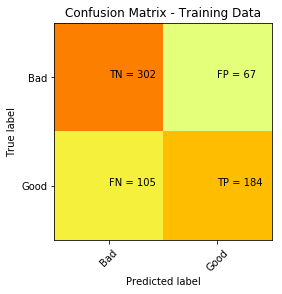

In [884]:
#plot the matrix
plt.clf()
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Bad','Good']
plt.title('Confusion Matrix - Training Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
plt.show()


In [885]:
print ('Classification evaluation measures on the training set\n')
# Accuracy (in [0,1], high is good):
# (TP + TN) / total = (184+302) / 658

accuracy = (TP + TN) / len(train)
print('Accuracy =', accuracy)

# Misclassification Rate (Error Rate, in [0,1], low is good):
# (FP+FN)/total= (67+105) / 658

misclassification = (FP + FN) / len(train)
print('Misclassification Rate =', misclassification)

#True Positive Rate (in [0,1], high is good):
# TP / actual Good = 184/(105+184)

TP_rate = TP / (FN + TP)
print('True Positive Rate =', TP_rate)

#False Positive Rate (in [0,1], low is good):
# FP / actual Bad = 67 / (302+67)

FP_rate = FP / (FP + TN)
print('False Positive Rate =', FP_rate)

#Precision: correctly predicted positive / predicted positive
# TP / (TP + FP)

precision = TP / (TP + FP)
print('Precision =', precision)

#Recall: correctly predicted positive / actual positive
# TP / (TP + FN)

recall = TP / (TP + FN)
print('Recall =', recall)

#F1-measure: aggregation of Precision and Recall
# F1 = 2 * (precision * recall) / (precision + recall)

F1 = 2 * (precision * recall) / (precision + recall)
print ('F1-measure =', F1)

print("\nClassification report:\n ", metrics.classification_report(y_opt1, multiple_linreg_predictions))

Classification evaluation measures on the training set

Accuracy = 0.7386018237082067
Misclassification Rate = 0.2613981762917933
True Positive Rate = 0.6366782006920415
False Positive Rate = 0.18157181571815717
Precision = 0.7330677290836654
Recall = 0.6366782006920415
F1-measure = 0.6814814814814815

Classification report:
               precision    recall  f1-score   support

          0       0.74      0.82      0.78       369
          1       0.73      0.64      0.68       289

avg / total       0.74      0.74      0.74       658



The classification evaluation measures computed on the training set indicates that the model is not very accurate.
The accuracy and the precision are just above 70%. Alse the F1 score indicates a relatively low value where it reaches its best value at 1.
This low accuracy can be due to the limited number of features we considered in our model or to the relatively low number of instances we are considering in our dataset.

A good sign is given by the fact that the FP are quite low (67 instances). FP in our scenario, where an instance which is wrongly categorized as 'Good' while in reality is 'Bad', can be problematic for the business as it could be trusted and then reveal as delinquent. 
In this contest, FN would probably not be causing much damage (from a business prospective) as certain 'Good' instance would be categorized are 'Bad' and may not be trusted. This could however be problematic from a customer point of view which may not be given credit for the wrong reason.

#### (2.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. 

In [886]:
#perfrom same steps on test dataset as done on training 

#original target feature (Good-Bad)
y_test = test.RiskPerformance

# create dataset only with continuos features
test_continuous = test.select_dtypes(['float64'])
# create dataset only with cateforical features
test_categorical = test.select_dtypes(['object'])

#drop features not included in the model
test_categorical_opt1=test_categorical.drop(columns=['MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M',
       'MaxDelqEver', 'MSinceMostRecentInqexcl7days'])
test_continuous_opt1=test_continuous.drop(columns=['MSinceOldestTradeOpen','MSinceMostRecentTradeOpen', \
                                                'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', \
                                                'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades',\
                                               'NumInstallTradesWBalance'])
#get dummies
test_opt1_cat_dummies = pd.get_dummies(test_categorical_opt1, drop_first=True)
#get full dataset
test_opt1_all = pd.concat([test_continuous_opt1, test_opt1_cat_dummies], axis=1)
#define test featues
X_test_opt1 = test_opt1_all.drop(columns=['RiskPerformance_Good'])
#target feature encoded
y_test_opt1 = test_opt1_all.RiskPerformance_Good

In [887]:
#predict on test dataset using trained model
predictions_test = multiple_linreg.predict(X_test_opt1)

#threshold predictions, values < 0.5 will be set to 0 ("Bad") and values >= 0.5 to 1 ("Good")
for n, i in enumerate(predictions_test):
    if i < 0.5:
        predictions_test[n] = 0
    else:
        predictions_test[n] = 1

#convert into int
predictions_test = [int(i) for i in predictions_test]

#create a list with explicit class name
predictions_test_class = []
for i in range (len(predictions_test)):
    if predictions_test[i] == 0:
        predictions_test_class.append("Bad")
    else:
        predictions_test_class.append("Good")
        
#first 100 predicted examples
print(predictions_test[:100])
print(predictions_test_class[:100])

[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
['Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',

In [888]:
#define the actual value of the target
test_actual_target_value = y_test.to_string(index=False).split('\n')
print(test_actual_target_value[:100])

['Good', ' Bad', ' Bad', ' Bad', ' Bad', ' Bad', ' Bad', 'Good', ' Bad', 'Good', 'Good', 'Good', ' Bad', ' Bad', 'Good', 'Good', ' Bad', 'Good', 'Good', 'Good', ' Bad', ' Bad', 'Good', 'Good', 'Good', 'Good', ' Bad', ' Bad', 'Good', 'Good', ' Bad', ' Bad', 'Good', ' Bad', 'Good', 'Good', 'Good', 'Good', ' Bad', ' Bad', 'Good', ' Bad', 'Good', 'Good', 'Good', ' Bad', 'Good', 'Good', 'Good', ' Bad', 'Good', ' Bad', 'Good', 'Good', 'Good', ' Bad', ' Bad', ' Bad', 'Good', 'Good', ' Bad', 'Good', 'Good', ' Bad', 'Good', ' Bad', ' Bad', ' Bad', ' Bad', ' Bad', ' Bad', 'Good', 'Good', 'Good', ' Bad', ' Bad', 'Good', ' Bad', 'Good', 'Good', 'Good', ' Bad', 'Good', ' Bad', ' Bad', 'Good', 'Good', 'Good', ' Bad', 'Good', 'Good', 'Good', ' Bad', ' Bad', ' Bad', 'Good', 'Good', 'Good', 'Good', ' Bad']


In [889]:
#display actual value vs prediction 
print("Predictions with multiple linear regression on test dataset: \n")
actual_vs_predicted_multiplelinreg_test = pd.concat([pd.DataFrame(test_actual_target_value, columns=['Actual']), pd.DataFrame(predictions_test_class, columns=['Predicted'])], axis=1)
#only first 100
print(actual_vs_predicted_multiplelinreg[:100])

Predictions with multiple linear regression on test dataset: 

   Actual Predicted
0     Bad       Bad
1     Bad       Bad
2    Good      Good
3     Bad       Bad
4     Bad       Bad
5     Bad      Good
6    Good      Good
7    Good       Bad
8    Good      Good
9    Good       Bad
10    Bad       Bad
11    Bad       Bad
12    Bad       Bad
13   Good      Good
14    Bad       Bad
15   Good      Good
16   Good       Bad
17   Good      Good
18    Bad       Bad
19    Bad       Bad
20    Bad       Bad
21   Good      Good
22   Good      Good
23    Bad       Bad
24    Bad       Bad
25   Good      Good
26   Good       Bad
27    Bad       Bad
28   Good      Good
29   Good       Bad
..    ...       ...
70   Good      Good
71   Good      Good
72    Bad       Bad
73    Bad       Bad
74    Bad       Bad
75   Good      Good
76   Good       Bad
77    Bad       Bad
78   Good      Good
79   Good       Bad
80    Bad       Bad
81    Bad       Bad
82    Bad       Bad
83   Good       Bad
84   Good       B

#### classification evaluation measures computed on the test set 

In [890]:
#confusion matrix
from sklearn.metrics import confusion_matrix

#fix the 'Bad' values as they have an extra space
y_true_test = []
for elem in test_actual_target_value:
    if elem == ' Bad':
        y_true_test.append('Bad')
    else:
        y_true_test.append(elem)
        
y_pred_test = predictions_test_class

#compute confusion matrix
matrix_test = confusion_matrix(y_true_test, y_pred_test, labels=["Bad", "Good"])
#define matrix component
TN, FP, FN, TP = confusion_matrix(y_true_test, y_pred_test).ravel()
#show matrix
matrix_test

array([[102,  33],
       [ 48, 100]])

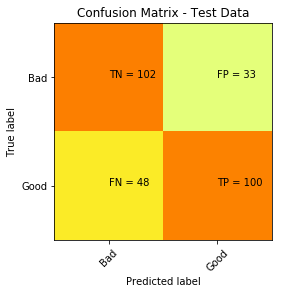

In [891]:
#plot the matrix
plt.clf()
plt.imshow(matrix_test, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Bad','Good']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(matrix_test[i][j]))
plt.show()

In [892]:
print ('Classification evaluation measures on the test set\n')

# Accuracy (in [0,1], high is good):
# (TP + TN) / total 
accuracy = (TP + TN) / len(test)
print('Accuracy =', accuracy)

# Misclassification Rate (Error Rate, in [0,1], low is good):
# (FP+FN)/total
misclassification = (FP + FN) / len(test)
print('Misclassification Rate =', misclassification)

#True Positive Rate (in [0,1], high is good):
# TP / actual Good 
TP_rate = TP / (FN + TP)
print('True Positive Rate =', TP_rate)

#False Positive Rate (in [0,1], low is good):
# FP / actual Bad 
FP_rate = FP / (FP + TN)
print('False Positive Rate =', FP_rate)

#Precision: correctly predicted positive / predicted positive
# TP / (TP + FP)
precision = TP / (TP + FP)
print('Precision =', precision)

#Recall: correctly predicted positive / actual positive
# TP / (TP + FN)
recall = TP / (TP + FN)
print('Recall =', recall)

#F1-measure: aggregation of Precision and Recall
# F1 = 2 * (precision * recall) / (precision + recall)
F1 = 2 * (precision * recall) / (precision + recall)
print ('F1-measure =', F1)

print("\nClassification report:\n ", metrics.classification_report(y_test_opt1, predictions_test))

Classification evaluation measures on the test set

Accuracy = 0.7137809187279152
Misclassification Rate = 0.2862190812720848
True Positive Rate = 0.6756756756756757
False Positive Rate = 0.24444444444444444
Precision = 0.7518796992481203
Recall = 0.6756756756756757
F1-measure = 0.7117437722419929

Classification report:
               precision    recall  f1-score   support

          0       0.68      0.76      0.72       135
          1       0.75      0.68      0.71       148

avg / total       0.72      0.71      0.71       283



| Measure     | training set   | test set         |
|-------------------------|----------------------|------------------------   |
| Accuracy          | 0.74 | 0.71              |
| Misclassification Rate       |  0.26    |   0.29       |
|True Positive Rate|  0.64 | 0.68|
|False Positive Rate           |0.18         | 0.24             |
|Precision        |   0.73       | 0.75            |
|Recall        |   0.64       | 0.68             |
|F1-measure        |   0.68       | 0.71              |


We can observe that the Classification evaluation measures are quite similar on both the training and test sets.
We can therefore assume that the model is not overfitted but predicts with the same accuracy training and testing data. However the accuracy and precision are still quite low (just above 70%)


#### Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).
We'll use Cross-Validation to train and test the model several time using K-fold Cross Validation with K = 10

In [893]:
# load original dataset for Cross Validation
df_CV = pd.read_csv('CreditRisk_final_18205940.csv')

#clean original dataset and keep only cosidered features

#original target feature (Good-Bad)
y_all_CV = df_CV.RiskPerformance

# create dataset only with continuos features
all_continuous_CV = df_CV.select_dtypes(['float64'])
# create dataset only with cateforical features
all_categorical_CV = df_CV.select_dtypes(['object'])

#drop features not included in the model
all_categorical_opt1_CV=all_categorical_CV.drop(columns=['MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M',
       'MaxDelqEver', 'MSinceMostRecentInqexcl7days'])
all_continuous_opt1_CV=all_continuous_CV.drop(columns=['MSinceOldestTradeOpen','MSinceMostRecentTradeOpen', \
                                                'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', \
                                                'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades',\
                                               'NumInstallTradesWBalance'])
#get dummies
all_opt1_cat_dummies_CV = pd.get_dummies(all_categorical_opt1_CV, drop_first=True)
#get full dataset for CV
all_opt1_CV = pd.concat([all_continuous_opt1_CV, all_opt1_cat_dummies_CV], axis=1)
#define test featues
all_X_opt1_CV = all_opt1_CV.drop(columns=['RiskPerformance_Good'])
#target feature encoded
all_y_opt1_CV = all_opt1_CV.RiskPerformance_Good

In [894]:
#K-Fold Cross Validation

from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score
X = all_X_opt1_CV # features
y = all_y_opt1_CV # target
kf = KFold(n_splits=10) # Define the split - into 10 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
KFold(n_splits=10, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)

We'll now perform the same operations we did on a single train/test split on each of the 10 splits.<br>
We will also calculate the average accuracy obtained with this method.

In [895]:
n_splits = 10
fold_n = 1
sum_accuracy = 0
sum_misclassification = 0
sum_TP_rate = 0
sum_FP_rate = 0
sum_precision = 0
sum_recall = 0
sum_F1 = 0

for train_index, test_index in kf.split(X):
    # split the dataset
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    #train the model
    model = LinearRegression().fit(X_train, y_train)
    #predict on test dataset using trained model
    predictions_test = multiple_linreg.predict(X_test)

    #threshold predictions, values < 0.5 will be set to 0 ("Bad") and values >= 0.5 to 1 ("Good")
    for n, i in enumerate(predictions_test):
        if i < 0.5:
            predictions_test[n] = 0
        else:
            predictions_test[n] = 1

    #convert into int
    y_pred_test = [int(i) for i in predictions_test]

    #compute confusion matrix
    matrix_test = confusion_matrix(y_test, y_pred_test, labels=[0, 1])
    #define matrix component
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred_test).ravel()
    
    print ('\nClassification evaluation measures on the test set n.', fold_n, '\n')

    accuracy = (TP + TN) / len(y_test)
    sum_accuracy += accuracy
    print('Accuracy =', accuracy)
    misclassification = (FP + FN) / len(y_test)
    sum_misclassification += misclassification
    print('Misclassification Rate =', misclassification)
    TP_rate = TP / (FN + TP)
    sum_TP_rate += TP_rate
    print('True Positive Rate =', TP_rate)
    FP_rate = FP / (FP + TN)
    sum_FP_rate += FP_rate
    print('False Positive Rate =', FP_rate)
    precision = TP / (TP + FP)
    sum_precision += precision
    print('Precision =', precision)
    recall = TP / (TP + FN)
    sum_recall += recall
    print('Recall =', recall)
    F1 = 2 * (precision * recall) / (precision + recall)
    sum_F1 += F1
    print ('F1-measure =', F1)
    print("\nClassification report:\n ", metrics.classification_report(y_test, y_pred_test))
    
    fold_n += 1

print('\nAverage Cross-Validation classification evaluation measures\n')
print('Average Accuracy =', sum_accuracy/n_splits)
print('Average Misclassification Rate =', sum_misclassification/ n_splits)
print('Average True Positive Rate =', sum_TP_rate/n_splits)
print('Average False Positive Rate =', sum_FP_rate/n_splits)
print('Average Precision =', sum_precision/n_splits)
print('Average Recall =', sum_recall/n_splits)
print ('Average F1-measure =', sum_F1/n_splits)


Classification evaluation measures on the test set n. 1 

Accuracy = 0.7578947368421053
Misclassification Rate = 0.24210526315789474
True Positive Rate = 0.6808510638297872
False Positive Rate = 0.16666666666666666
Precision = 0.8
Recall = 0.6808510638297872
F1-measure = 0.7356321839080461

Classification report:
               precision    recall  f1-score   support

          0       0.73      0.83      0.78        48
          1       0.80      0.68      0.74        47

avg / total       0.76      0.76      0.76        95


Classification evaluation measures on the test set n. 2 

Accuracy = 0.7127659574468085
Misclassification Rate = 0.2872340425531915
True Positive Rate = 0.574468085106383
False Positive Rate = 0.14893617021276595
Precision = 0.7941176470588235
Recall = 0.574468085106383
F1-measure = 0.6666666666666666

Classification report:
               precision    recall  f1-score   support

          0       0.67      0.85      0.75        47
          1       0.79      0.

| Measure     | training set (70% split)  | test set (30% split)        |  10-fold Cross-Validation (average values)|
|-------------------------|----------------------|------------------------   |------------------------   |
| Accuracy          | 0.74 | 0.71              | 0.73|
| Misclassification Rate       |  0.26    |   0.29       |0.27 |
|True Positive Rate|  0.64 | 0.68| 0.65|
|False Positive Rate           |0.18         | 0.24             | 0.20|
|Precision        |   0.73       | 0.75           | 0.74 |
|Recall        |   0.64       | 0.68             | 0.65 |
|F1-measure        |   0.68       | 0.71              | 0.69 |

We can observe that the model created with the initial 70-30 random split, has very similar evaluation measures to the average obtained from a 10-fold CV. This confirms that the model is not underfittig or overfitting and has got most of the patterns from the data correctly. 

## 3 - Predictive Modeling: Logistic Regression.

#### (3.1) On the training set, train a logistic regression model to predict the target feature, using the descriptive features selected in exercise (1) above.  

We'll use the same steps and train/test datasets used in part 2.1. 

- <b>X_opt1</b> represents the training dataset containing all the features considered in the model
- <b>y_opt1</b> represents the training dataset containing the target feature
- <b>X_test_opt1</b> represents the test dataset containing all the features considered in the model
- <b>y_test_opt1</b> represents the test dataset containing the target feature

Note that the target feature RiskPerformance is already encoded as 1 for 'Good' and 0 for 'Bad'

In [896]:
# train multiple logistic regression model
multiple_logreg = LogisticRegression().fit(X_opt1, y_opt1)

#### (3.2) Print the coefficients learned by the model and discuss their role in the model (e.g., interpret the model).    

In [897]:
# Print the weights learned for each feature.
print("\nIntercept: \n", multiple_logreg.intercept_)
multiple_logreg_coef = pd.DataFrame(sorted(list(zip(multiple_logreg.coef_[0], X_opt1)), reverse=True), columns = ["Coeficient","Feature"])
multiple_logreg_coef



Intercept: 
 [-1.73387164]


Coeficient                             Feature
0     0.120136                    RiskEst_Low Risk
1     0.114542          RevBalance/CreditLimit_Low
2     0.066862               NumSatisfactoryTrades
3     0.044630                ExternalRiskEstimate
4     0.007550                      AverageMInFile
5     0.005363               PercentTradesWBalance
6    -0.004451          NetFractionRevolvingBurden
7    -0.027336              PercentTradesNeverDelq
8    -0.113497          NumRevolvingTradesWBalance
9    -0.167432                        NumInqLast6M
10   -0.311198  NumBank2NatlTradesWHighUtilization
11   -0.493301                      TradesDelq_Yes
12   -0.493301                        PrevDelq_Yes

The transformation from probability to odds is a monotonic transformation, meaning the odds increase as the probability increases or vice versa.  Probability ranges from 0 and 1.  Odds range from 0 and positive infinity. 

In logistic regression, coefficient $\beta$ represents the change in the log-odds for a unit change in the feature x.

This means that ${e^\beta}$ gives us the change in the odds for a unit change in x.

Since we are working with an exponential operation, a tiny change in $\beta$ leads to a big change in the odds.

for example (considering only the features with greater values):

- <i>**RiskEst_Low Risk**</i> the coefficient ${\beta = 0.12}$. ${e^\beta} = 1.13$. This means that a change in the binary feature from 0 to 1 will increase the odds to predict a value of 1 by 1.13
- <i>**RevBalance/CreditLimit_Low**</i> the coefficient ${\beta = 0.11}$. ${e^\beta} = 1.12$. This means that a change in the binary feature from 0 to 1 will increase the odds to predict a value of 1 by 1.12
- <i>**NumSatisfactoryTrades**</i> the coefficient ${\beta = 0.07}$. ${e^\beta} = 1.07$. This means that an increase  in the continuous feature of 1 will increase the odds to predict a value of 1 by 1.07
- <i>**ExternalRiskEstimate**</i> the coefficient ${\beta = 0.04}$. ${e^\beta} = 1.04$. This means that an increase  in the continuous feature of 1 will increase the odds to predict a value of 1 by 1.04
- <i>**NumInqLast6M**</i> the coefficient ${\beta = -0.17}$. ${e^\beta} = 0.84$. This means that an increase in the continuous feature of 1 will increase the odds to predict a value of 1 by 0.84
- <i>**NumBank/NatlTradesWHighUtilization**</i> the coefficient ${\beta = -0.31}$. ${e^\beta} = 0.73$. This means that an increase in the continuous feature of 1 will increase the odds to predict a value of 1 by 0.73
- <i>**TradesDelq_Yes**</i> the coefficient ${\beta = -0.49}$. ${e^\beta} = 0.61$. This means that a change in the binary feature from 0 to 1 will increase the odds to predict a value of 1 by 0.61
- <i>**PrevDelq_Yes**</i> the coefficient ${\beta = -0.49}$. ${e^\beta} = 0.61$. This means that a change in the binary feature from 0 to 1 will increase the odds to predict a value of 1 by 0.61

We can observe that overall, the values of the coefficients are quite low and again, we don't observe any particular trend but we can confirm that certain features seem to have a higher impact than others. We can also state that these features with higher impact correspond to the ones of the linear regression model. Worth to mention is that the feature <i>**RiskEst_Low Risk**</i> has an opposite behaviour compared to the linear regression model.

#### (3.3) Print the predicted target feature value for the first 100 training examples. Print the predicted class for the first 100 examples. Print the classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.


In [898]:
# Predicted probabilities for each example. 
# The output is a pair for each example, 
# The first component is the probability of the negative class (class 0).
# The second component is the probability of the positive class (class 1).
multiple_logreg_predicted_probs = multiple_logreg.predict_proba(X_opt1)
multiple_logreg_predicted_probs

array([[0.66972166, 0.33027834],
       [0.66310749, 0.33689251],
       [0.11635426, 0.88364574],
       ...,
       [0.732656  , 0.267344  ],
       [0.63064434, 0.36935566],
       [0.20869067, 0.79130933]])

In [899]:
# Predict class using the trained model
multiple_logreg_predicted_class = multiple_logreg.predict(X_opt1)
#first 100 examples
multiple_logreg_predicted_class[:100]

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=uint8)

In [900]:
#define the actual value of the target
train_actual_target_value = y_opt1.to_string(index=False).split('\n')
#display actual value vs prediction 
print("Predictions with multiple logistic regression: \n")
actual_vs_predicted_multiplelogreg = pd.concat([pd.DataFrame(train_actual_target_value, columns=['Actual']),\
                                                pd.DataFrame(multiple_logreg_predicted_class, columns=['Predicted'])],\
                                               axis=1)
#only first 100
actual_vs_predicted_multiplelogreg[:100]

Predictions with multiple logistic regression: 



Actual  Predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       0          1
5       0          1
6       1          1
7       1          0
8       1          1
9       1          0
10      0          0
11      0          0
12      0          0
13      1          1
14      0          0
15      1          1
16      1          0
17      1          1
18      0          0
19      0          0
20      0          0
21      1          1
22      1          1
23      0          0
24      0          0
25      1          1
26      1          0
27      0          0
28      1          1
29      1          0
..    ...        ...
70      1          1
71      1          1
72      0          1
73      0          0
74      0          0
75      1          1
76      1          0
77      0          1
78      1          1
79      1          0
80      0          0
81      0          0
82      0          0
83      1          0
84      1          0
85      0          1
86      0          0
87      1          1
88      0          0
89      1          1
90      0          0
91      1          0
92      1          1
93      0          0
94      0          0
95      0          0
96      1          0
97      0          1
98      0          0
99      1          1

[100 rows x 2 columns]

In [901]:
print("Classification Evaluation Measures - Logistic Regression - Training Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_opt1, multiple_logreg_predicted_class))
TN, FP, FN, TP = confusion_matrix(y_opt1, multiple_logreg_predicted_class).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_opt1, multiple_logreg_predicted_class))
misclassification = (FP + FN) / len(y_opt1)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_opt1, multiple_logreg_predicted_class))

Classification Evaluation Measures - Logistic Regression - Training Data

Confusion matrix: 
 [[294  75]
 [104 185]]

Accuracy:  0.7279635258358662

Misclassification Rate = 0.27203647416413373

True Positive Rate = 0.6401384083044983

False Positive Rate = 0.2032520325203252

Classification report:
               precision    recall  f1-score   support

          0       0.74      0.80      0.77       369
          1       0.71      0.64      0.67       289

avg / total       0.73      0.73      0.73       658



The classification evaluation measures computed on the training set indicates that the model shows a similar accuracy as the linear regressiom model.
The accuracy and the precision are just above 70%. Alse the F1 score indicates a relatively low value where it reaches its best value at 1.
This low accuracy can be due to the limited number of features we considered in our model or to the relatively low number of instances we are considering in our dataset.

In more details we can observe from the classification report that the prediction accuracy for the class 0 ("bad") is higher, 74%, that for class 1 ("Good"). This may be linked to the fact that the target feature percetage in the training data is distributes as: 56% "Bad" and 44% "Good".

Also in this case, a good sign is given by the fact that the FP are quite low (75 instances). FP in our scenario, where an instance which is wrongly categorized as 'Good' while in reality is 'Bad', can be problematic for the business as it could be trusted and then reveal as delinquent. 
In this contest, FN would probably not be causing much damage (from a business prospective) as certain 'Good' instance would be categorized are 'Bad' and may not be trusted. This could however be problematic from a customer point of view which may not be given credit for the wrong reason.

#### (3.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).

In [902]:
predictions_test = multiple_logreg.predict(X_test_opt1)
predictions_test

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
      dtype=uint8)

In [903]:
#define the actual value of the target
train_actual_target_value = y_test_opt1.to_string(index=False).split('\n')
#display actual value vs prediction 
print("Predictions with multiple logistic regression: \n")
actual_vs_predicted_multiplelogreg = pd.concat([pd.DataFrame(train_actual_target_value, columns=['Actual']),\
                                                pd.DataFrame(predictions_test, columns=['Predicted'])], axis=1)
#only first 10
actual_vs_predicted_multiplelogreg[:10]

Predictions with multiple logistic regression: 



Actual  Predicted
0      1          1
1      0          0
2      0          1
3      0          0
4      0          0
5      0          0
6      0          0
7      1          1
8      0          0
9      1          1

In [904]:
print("Classification Evaluation Measures - Logistic Regression - Test Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_opt1, predictions_test))
TN, FP, FN, TP = confusion_matrix(y_test_opt1, predictions_test).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_test_opt1, predictions_test))
misclassification = (FP + FN) / len(y_test_opt1)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_test_opt1, predictions_test))

Classification Evaluation Measures - Logistic Regression - Test Data

Confusion matrix: 
 [[102  33]
 [ 46 102]]

Accuracy:  0.7208480565371025

Misclassification Rate = 0.2791519434628975

True Positive Rate = 0.6891891891891891

False Positive Rate = 0.24444444444444444

Classification report:
               precision    recall  f1-score   support

          0       0.69      0.76      0.72       135
          1       0.76      0.69      0.72       148

avg / total       0.72      0.72      0.72       283



| Measure     | training set   | test set         |
|-------------------------|----------------------|------------------------   |
| Accuracy          | 0.73 | 0.72              |
| Misclassification Rate       |  0.27    |   0.28       |
|True Positive Rate|  0.64 | 0.69|
|False Positive Rate           |0.20         | 0.24             |
|Precision        |   0.73       | 0.72            |
|Recall        |   0.73       | 0.72             |
|F1-measure        |   0.73       | 0.72              |


We can observe that the Classification evaluation measures also for the logistic regression are quite similar on both the training and test sets.
There is a very slight decrease in accuracy (1%) and we can therefore assume that the model is not overfitted but predicts with the same accuracy training and testing data. However the accuracy and precision are still quite low (just above 70%).

#### Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).

We'll use the same steps and train/test datasets used in part 2.4. 

- <b>all_X_opt1_CV</b> represents the whole dataset containing all the features considered in the model
- <b>all_y_opt1_CV</b> represents the whole dataset containing the target feature


In [905]:
# Evaluate the model using 10-fold cross-validation.
# Uses 9/10 of data for training and the last 1/10 for testing. 
# This process is repeated 10 times. 
X = all_X_opt1_CV
y = all_y_opt1_CV

logreg_CV_accuracy = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print("\nAccuracy CV scores:", logreg_CV_accuracy)
print("\nAccuracy CV mean score:",logreg_CV_accuracy.mean())

logreg_CV_precision = cross_val_score(LogisticRegression(), X, y, scoring='precision', cv=10)
print("\nPrecision CV scores:", logreg_CV_precision)
print("\nPrecision CV mean score:",logreg_CV_precision.mean())

logreg_CV_recall = cross_val_score(LogisticRegression(), X, y, scoring='recall', cv=10)
print("\nRecall CV scores:", logreg_CV_recall)
print("\nRecall CV mean score:",logreg_CV_recall.mean())

logreg_CV_F1 = cross_val_score(LogisticRegression(), X, y, scoring='f1', cv=10)
print("\nF1 CV scores:", logreg_CV_F1)
print("\nF1 CV mean score:",logreg_CV_F1.mean())


Accuracy CV scores: [0.75789474 0.72631579 0.72631579 0.73684211 0.77659574 0.70212766
 0.72340426 0.69892473 0.69892473 0.76344086]

Accuracy CV mean score: 0.7310786403207745

Precision CV scores: [0.75609756 0.70454545 0.69565217 0.77142857 0.81081081 0.68181818
 0.71428571 0.68292683 0.66666667 0.71428571]

Precision CV mean score: 0.719851767799806

Recall CV scores: [0.70454545 0.70454545 0.72727273 0.61363636 0.68181818 0.68181818
 0.68181818 0.65116279 0.69767442 0.81395349]

Recall CV mean score: 0.6958245243128964

F1 CV scores: [0.72941176 0.70454545 0.71111111 0.6835443  0.74074074 0.68181818
 0.69767442 0.66666667 0.68181818 0.76086957]

F1 CV mean score: 0.705820038902573


| Measure     | training set (70% split)  | test set (30% split)        |  10-fold Cross-Validation (average values)|
|-------------------------|----------------------|------------------------   |------------------------   |
| Accuracy          | 0.73 | 0.72              | 0.73 |
|Precision        |   0.73       | 0.72            | 0.72 |
|Recall        |   0.73       | 0.72             | 0.70 |
|F1-measure        |   0.73       | 0.72              | 0.71 |

As it occured for the linear regression model, we can observe that the model created with the initial 70-30 random split, has very similar evaluation measures to the average obtained from a 10-fold CV. This confirms that the model is not underfittig or overfitting and has got most of the patterns from the data correctly. 

## (4) **Predictive Modeling:** Random Forest.  
#### (4.1) On the training set, train a random forest model to predict the target feature, using the descriptive features selected in exercise (1) above. 


We'll use the same steps and train/test datasets used in part 2.1 and 3.1. 

- <b>X_opt1</b> represents the training dataset containing all the features considered in the model
- <b>y_opt1</b> represents the training dataset containing the target feature
- <b>X_test_opt1</b> represents the test dataset containing all the features considered in the model
- <b>y_test_opt1</b> represents the test dataset containing the target feature

Note that the target feature RiskPerformance is already encoded as 1 for 'Good' and 0 for 'Bad'

Notes from sklearn documentation: The main parameters to adjust when using this method are ```n_estimators``` and ```max_features```. The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees. The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias. Empirical good default values are max_features=n_features for regression problems, and max_features=sqrt(n_features) for classification tasks (where n_features is the number of features in the data). (https://scikit-learn.org/stable/modules/ensemble.html#forest).<br>
Another parameter to take into account is ```max_depth``` which by default is set to ```None``` and represents the maximum depth of the tree. If ```None```, then nodes are expanded until all leaves are pure or until all leaves contain less than ```min_samples_split``` samples. (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier).<br>
From https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use the suggested initial value of ```max_depth=3``` to get a feel for how the tree is fitting to your data, and then increase the depth.

In [906]:
# Train RF with 500 trees
rfc = RandomForestClassifier(n_estimators=500, max_features='auto',oob_score=True, random_state=1)
# Fit model on training dataset
rfc.fit(X_opt1, y_opt1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

####  (4.2) Can you interpret the random forest model? Discuss any knowledge you can gain for the working of this model. 

We'll now extract a tree from the forest (```n_estimators```) and create a graph using Graphviz as an example

In [907]:
import random
# Extract a random single tree
estimator = rfc.estimators_[random.randint(0,500)]

# create a Graphviz file which has extension .dot
with open("Tree.dot", 'w') as f:
    f = export_graphviz(estimator, out_file=f, feature_names=X_opt1.columns)

#show graph 
path = 'Tree.dot'
s = Source.from_file(path)
s.view()

'Tree.dot.pdf'

In [908]:
#display a table containing the features importance
random_forest_importance = pd.DataFrame(sorted(list(zip(rfc.feature_importances_, X_opt1)), reverse=True),\
                                        columns = ["Importance","Feature"])
random_forest_importance

Importance                             Feature
0     0.177471                ExternalRiskEstimate
1     0.135400                      AverageMInFile
2     0.127680          NetFractionRevolvingBurden
3     0.121843               NumSatisfactoryTrades
4     0.100134               PercentTradesWBalance
5     0.069945          NumRevolvingTradesWBalance
6     0.066442              PercentTradesNeverDelq
7     0.055502                        NumInqLast6M
8     0.044728                    RiskEst_Low Risk
9     0.044000  NumBank2NatlTradesWHighUtilization
10    0.027447          RevBalance/CreditLimit_Low
11    0.015072                        PrevDelq_Yes
12    0.014338                      TradesDelq_Yes

([<matplotlib.axis.XTick at 0x1a287b4240>,
 <a list of 2 Text xticklabel objects>)

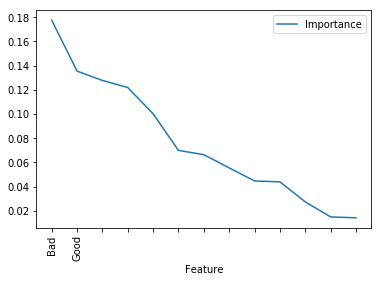

In [909]:
#plot a graph that shows features importance
random_forest_importance.plot('Feature', 'Importance')
tick_marks = np.arange(len(random_forest_importance.Feature))
plt.xticks(tick_marks, classNames, rotation=90)

Feature importance helps understanding which variable is contributing the most to the model and is fundamental to interpreting the results.<br>
```feature_importances_``` in ```RandomForestClassifier``` is sometimes called "gini importance" or "mean decrease impurity" and is defined as the total decrease in node impurity (weighted by the probability of reaching that node (which is approximated by the proportion of samples reaching that node)) averaged over all trees of the ensemble. (https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined)

The table above shows each feature and their importance in the Random Forest model created. We can observe that the most important features are:

- <i>**ExternalRiskEstimate**</i>
- <i>**AverageMInFile**</i>
- <i>**NetFractionRevolvingBurden**</i>
- <i>**NumSatisfactoryTrades**</i>
- <i>**PercentTradesWBalance**</i>

In comparison with the coefficients of the models analysed in part 2 and 3, we can observe that also for Random Forest 
<i>**ExternalRiskEstimate**</i> and <i>**NumSatisfactoryTrades**</i> show a high importance while the other features did not have high coefficients.

We can observe that overall, the values of the coefficients are quite low and again, we don't observe any particular trend but we can confirm that certain features seem to have a higher impact than others.

Note that the values contained in the table above are obtained using ```n_estimators=500```, this could be set to higher values but some testing showed that the importance values will not change, and ```max_features='auto'``` which gives the same results as if the parameter is set to 3 (which approximates the square root of the number of features considered, $\sqrt{13} \approx 3$ ).<br>
Also, the parameter ```max_depth=None```, represents the maximum depth of the tree.

Further information about the model and the feature importance can be obtained using ```treeinterpreter```.<br>
```treeinterpreter``` library can decompose scikit-learn‘s decision tree and random forest model predictions.<br>
With this package, each prediction is decomposed into a sum of contributions from each feature i.e. $prediction=bias+feature_1contribution+…+feature_ncontribution$ <br>
Which makes each prediction similar to the result of linear equation, like the models seen in parts 2 and 3.<br>
(http://blog.datadive.net/interpreting-random-forests/)

Let's see an example of a the first instance prediction.

In [910]:
from treeinterpreter import treeinterpreter as ti
prediction, bias, contributions = ti.predict(rfc, X_opt1[:1])

print('Prediction:', prediction)
print('bias:', bias)
i=0
for elem in X_opt1.columns:
    print(elem, 'contribution =', contributions[0][i])
    i+=1

Prediction: [[0.816 0.184]]
bias: [[0.56141033 0.43858967]]
ExternalRiskEstimate contribution = [ 0.01358383 -0.01358383]
AverageMInFile contribution = [ 0.01366333 -0.01366333]
NumSatisfactoryTrades contribution = [-0.01075709  0.01075709]
PercentTradesNeverDelq contribution = [-0.00723409  0.00723409]
NumInqLast6M contribution = [ 0.03632821 -0.03632821]
NetFractionRevolvingBurden contribution = [ 0.00521394 -0.00521394]
NumRevolvingTradesWBalance contribution = [ 0.02348667 -0.02348667]
NumBank2NatlTradesWHighUtilization contribution = [ 0.06166187 -0.06166187]
PercentTradesWBalance contribution = [ 0.01312506 -0.01312506]
PrevDelq_Yes contribution = [ 0.01150147 -0.01150147]
RiskEst_Low Risk contribution = [ 0.05793933 -0.05793933]
TradesDelq_Yes contribution = [ 0.00882012 -0.00882012]
RevBalance/CreditLimit_Low contribution = [ 0.02725703 -0.02725703]


Each element (```prediction, bias, contributions```) given by ```treeinterpreter``` is an array composed of two element where the first component is the probability of the target outcome "Bad", i.e. 0, and the second is the probability of the outcome "Goog", i.e. 1.<br>
The ```prediction``` of the first intance, having a higher probability (0.8) on the first component (index 0), means a prediction of "Bad" (correctly predicted).<br>
We can observe that the ```bias``` values match the percentage of "Bad" (56%) and "Good" (44%) instances in the training dataset (see beginning of notebook).<br>
Finally, we can observe the ```contribution```, i.e. importance, of each feature towards the final outcome for this particular prediction. Note that each prediction will be different and the importance of each feature varies from case to case.

With this method is therefore easy to understand where the predicted value comes from.

#### (4.3) Print the predicted target feature value for the first 100 training examples. Print the predicted class for the first 100 examples. Print the classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.

In [911]:
# Predicted probabilities for all examples. 
# The output is a pair for each example, 
# The first component is the probability of the negative class (class 0, "Bad").
# The second component is the probability of the positive class (class 1, "Good").
random_forest_predicted = rfc.predict_proba(X_opt1)
random_forest_predicted

array([[0.816, 0.184],
       [0.828, 0.172],
       [0.014, 0.986],
       ...,
       [0.316, 0.684],
       [0.806, 0.194],
       [0.104, 0.896]])

In [912]:
# Predict class using the trained model
random_forest_predicted_class = rfc.predict(X_opt1)
#first 100 examples
random_forest_predicted_class[:100]

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=uint8)

In [913]:
#define the actual value of the target
train_actual_target_value = y_opt1.to_string(index=False).split('\n')
#display actual value vs prediction 
print("Predictions with random forest: \n")
actual_vs_predicted_randomforest = pd.concat([pd.DataFrame(train_actual_target_value, columns=['Actual']),\
                                              pd.DataFrame(random_forest_predicted_class, columns=['Predicted'])], \
                                             axis=1)
#only first 100
actual_vs_predicted_randomforest[:100]

Predictions with random forest: 



Actual  Predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       0          0
5       0          0
6       1          1
7       1          1
8       1          1
9       1          1
10      0          0
11      0          0
12      0          0
13      1          1
14      0          0
15      1          1
16      1          1
17      1          1
18      0          0
19      0          0
20      0          0
21      1          1
22      1          1
23      0          0
24      0          0
25      1          1
26      1          1
27      0          0
28      1          1
29      1          1
..    ...        ...
70      1          1
71      1          1
72      0          0
73      0          0
74      0          0
75      1          1
76      1          1
77      0          0
78      1          1
79      1          1
80      0          0
81      0          0
82      0          0
83      1          1
84      1          1
85      0          0
86      0          0
87      1          1
88      0          0
89      1          1
90      0          0
91      1          1
92      1          1
93      0          0
94      0          0
95      0          0
96      1          1
97      0          0
98      0          0
99      1          1

[100 rows x 2 columns]

In [914]:
print("Classification Evaluation Measures - Random Forest - Training Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_opt1, random_forest_predicted_class))
TN, FP, FN, TP = confusion_matrix(y_opt1, random_forest_predicted_class).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_opt1, random_forest_predicted_class))
misclassification = (FP + FN) / len(y_opt1)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_opt1, random_forest_predicted_class))

Classification Evaluation Measures - Random Forest - Training Data

Confusion matrix: 
 [[369   0]
 [  0 289]]

Accuracy:  1.0

Misclassification Rate = 0.0

True Positive Rate = 1.0

False Positive Rate = 0.0

Classification report:
               precision    recall  f1-score   support

          0       1.00      1.00      1.00       369
          1       1.00      1.00      1.00       289

avg / total       1.00      1.00      1.00       658



We can observe that the predicted target feature value match perfectly the actual target values. This indicates that the model is overfitted on the training data and it's problematic as it would not be accurate on a different dataset, i.e. the test dataset.<br>
As per https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use better results could be achived by reducing ```max_depth```.

#### (4.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset) and with the out-of-sample error.


In [915]:
#predict using trained model on test dataset
predictions_rf_test = rfc.predict(X_test_opt1)
#define the actual value of the target
train_actual_target_value = y_test_opt1.to_string(index=False).split('\n')
#display actual value vs prediction 
print("Predictions with random forest on test dataset: \n")
actual_vs_predicted_random_forest = pd.concat([pd.DataFrame(train_actual_target_value, columns=['Actual']),\
                                                pd.DataFrame(predictions_rf_test, columns=['Predicted'])], axis=1)
#only first 10
actual_vs_predicted_random_forest[:10]

Predictions with random forest on test dataset: 



Actual  Predicted
0      1          1
1      0          0
2      0          1
3      0          0
4      0          0
5      0          1
6      0          0
7      1          1
8      0          0
9      1          1

In [916]:
print("Classification Evaluation Measures - Random Forest - Test Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_opt1, predictions_rf_test))
TN, FP, FN, TP = confusion_matrix(y_test_opt1, predictions_rf_test).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_test_opt1, predictions_rf_test))
misclassification = (FP + FN) / len(y_test_opt1)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_test_opt1, predictions_rf_test))

Classification Evaluation Measures - Random Forest - Test Data

Confusion matrix: 
 [[105  30]
 [ 51  97]]

Accuracy:  0.7137809187279152

Misclassification Rate = 0.2862190812720848

True Positive Rate = 0.6554054054054054

False Positive Rate = 0.2222222222222222

Classification report:
               precision    recall  f1-score   support

          0       0.67      0.78      0.72       135
          1       0.76      0.66      0.71       148

avg / total       0.72      0.71      0.71       283



| Measure     | training set (70% split)  | test set (30% split)        |
|-------------------------|----------------------|------------------------  |
| Accuracy          | 1 | 0.71              |
|Precision        |   1       | 0.72            |
|Recall        |   1       | 0.71             |
|F1-measure        |   1       | 0.71              |

We can observe that the model performs very differently on the training data and on a new, test, dataset. This indicates that the model created is overfitted on the training data and therefore is not able to maintain its precision and accuracy when new data is submitted. <br>
Furthermore, we can observe that, even if there is a high decrease in the classification measures values considering training and test dataset, the performance indicators have a values around 70% on the test dataset which are very similar to the values obtained with the linear models discussed in the previous sections.

We'll now evaluate the same model using a 10-fold Cross-Validation.

#### Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset) and with the out-of-sample error.

We'll use the same steps and train/test datasets used in part 2.4 and 3.4. 

- <b>all_X_opt1_CV</b> represents the whole dataset containing all the features considered in the model
- <b>all_y_opt1_CV</b> represents the whole dataset containing the target feature

In [917]:
# Evaluate the model using 10-fold cross-validation.
# Uses 9/10 of data for training and the last 1/10 for testing. 
# This process is repeated 10 times. 
X = all_X_opt1_CV
y = all_y_opt1_CV

random_forest_CV_accuracy = cross_val_score(RandomForestClassifier(n_estimators=500, max_features='auto', \
                                                                   oob_score=True, random_state=1), X, y,\
                                                                    scoring='accuracy', cv=10)
print("\nAccuracy CV scores:", random_forest_CV_accuracy)
print("\nAccuracy CV mean score:",random_forest_CV_accuracy.mean())

random_forest_CV_precision = cross_val_score(RandomForestClassifier(n_estimators=500, max_features='auto', \
                                                                   oob_score=True, random_state=1), X, y,\
                                                                    scoring='precision', cv=10)
print("\nPrecision CV scores:", random_forest_CV_precision)
print("\nPrecision CV mean score:",random_forest_CV_precision.mean())

random_forest_CV_recall = cross_val_score(RandomForestClassifier(n_estimators=500, max_features='auto', \
                                                                   oob_score=True, random_state=1), X, y,\
                                                                    scoring='recall', cv=10)
print("\nRecall CV scores:", random_forest_CV_recall)
print("\nRecall CV mean score:",random_forest_CV_recall.mean())

random_forest_CV_F1 = cross_val_score(RandomForestClassifier(n_estimators=500, max_features='auto', \
                                                                   oob_score=True, random_state=1), X, y,\
                                                                    scoring='f1', cv=10)
print("\nF1 CV scores:", random_forest_CV_F1)
print("\nF1 CV mean score:",random_forest_CV_F1.mean())


Accuracy CV scores: [0.72631579 0.68421053 0.70526316 0.69473684 0.70212766 0.70212766
 0.73404255 0.67741935 0.69892473 0.8172043 ]

Accuracy CV mean score: 0.7142372575226674

Precision CV scores: [0.71428571 0.65217391 0.67391304 0.7027027  0.73529412 0.7
 0.77142857 0.66666667 0.6744186  0.7826087 ]

Precision CV mean score: 0.707349202955579

Recall CV scores: [0.68181818 0.68181818 0.70454545 0.59090909 0.56818182 0.63636364
 0.61363636 0.60465116 0.6744186  0.8372093 ]

Recall CV mean score: 0.6593551797040169

F1 CV scores: [0.69767442 0.66666667 0.68888889 0.64197531 0.64102564 0.66666667
 0.6835443  0.63414634 0.6744186  0.80898876]

F1 CV mean score: 0.6803995604451479


#### out-of-bag classification accuracy
In Breiman's original implementation of the random forest algorithm, each tree is trained on about 2/3 of the total training data. As the forest is built, each tree can thus be tested (similar to leave one out cross validation) on the samples not used in building that tree. This is the out of bag error estimate - an internal error estimate of a random forest as it is being constructed. (https://stackoverflow.com/questions/18541923/what-is-out-of-bag-error-in-random-forests)

In [918]:
# compute the out-of-bag classification accuracy
rfc.oob_score_

0.7127659574468085

| Measure| training set (70% split)| test set (30% split)|10-fold Cross-Validation (average values)|
|-------------------------|----------------------|----------|------------   |
|Accuracy          | 1 | 0.71              | 0.71 |
|Precision        |   1       | 0.72            | 0.71 |
|Recall        |   1       | 0.71             | 0.69 |
|F1-measure        |   1       | 0.71              | 0.68 |

|Out-of-Bag score|
|-----------------|
| 0.71 |

We can observe that the Cross-Validation confirms the accuracy found with the model trained on the 70% of the dataset and tested on the remaining 30%. <br>
Also the Out-of-Bag error shows the same value. 

We can therefore see that even if the model appears to be overfitted on the trainin data, on a new dataset it gives prediction with an accuracy just above 70%, which is very similar to the results obtained with the linear models.

Overfitting is a common issue of a Random Forest model and this can be addressed by performing CV with various parameters until we find the best model.

As a first attempt we can try to reduce the ```max_depth``` to be equal to 3 and check for improvements.

In [919]:
# Evaluate the model using 10-fold cross-validation and setting max depth to 3
# Uses 9/10 of data for training and the last 1/10 for testing. 
# This process is repeated 10 times. 
X = all_X_opt1_CV
y = all_y_opt1_CV

random_forest_CV_accuracy = cross_val_score(RandomForestClassifier(n_estimators=500, max_features='auto', \
                                                                   oob_score=True, max_depth = 3, random_state=1),\
                                                                    X, y, scoring='accuracy', cv=10)
print("\nAccuracy CV scores:", random_forest_CV_accuracy)
print("\nAccuracy CV mean score:",random_forest_CV_accuracy.mean())

random_forest_CV_precision = cross_val_score(RandomForestClassifier(n_estimators=500, max_features='auto', \
                                                                   oob_score=True, max_depth = 3, random_state=1),\
                                                                    X, y, scoring='precision', cv=10)
print("\nPrecision CV scores:", random_forest_CV_precision)
print("\nPrecision CV mean score:",random_forest_CV_precision.mean())

random_forest_CV_recall = cross_val_score(RandomForestClassifier(n_estimators=500, max_features='auto', \
                                                                   oob_score=True, max_depth = 3, random_state=1),\
                                                                    X, y, scoring='recall', cv=10)
print("\nRecall CV scores:", random_forest_CV_recall)
print("\nRecall CV mean score:",random_forest_CV_recall.mean())

random_forest_CV_F1 = cross_val_score(RandomForestClassifier(n_estimators=500, max_features='auto', \
                                                                   oob_score=True, max_depth = 3, random_state=1),\
                                                                    X, y, scoring='f1', cv=10)
print("\nF1 CV scores:", random_forest_CV_F1)
print("\nF1 CV mean score:",random_forest_CV_F1.mean())

# Train new with defined parmeters
rfc_CV = RandomForestClassifier(n_estimators=500, max_features='auto', \
                                                                   oob_score=True, max_depth = 3, random_state=1)
# Fit model on training dataset
rfc_CV.fit(X_opt1, y_opt1)
print("\nOut-of-Bag Score:", rfc_CV.oob_score_)


Accuracy CV scores: [0.74736842 0.68421053 0.71578947 0.70526316 0.69148936 0.73404255
 0.70212766 0.65591398 0.70967742 0.79569892]

Accuracy CV mean score: 0.7141581475996099

Precision CV scores: [0.72727273 0.65909091 0.68085106 0.71052632 0.7027027  0.73170732
 0.72222222 0.64102564 0.68181818 0.75      ]

Precision CV mean score: 0.7007217080824816

Recall CV scores: [0.72727273 0.65909091 0.72727273 0.61363636 0.59090909 0.68181818
 0.59090909 0.58139535 0.69767442 0.8372093 ]

Recall CV mean score: 0.6707188160676533

F1 CV scores: [0.72727273 0.65909091 0.7032967  0.65853659 0.64197531 0.70588235
 0.65       0.6097561  0.68965517 0.79120879]

F1 CV mean score: 0.6836674647792905

Out-of-Bag Score: 0.7173252279635258


We can observe that the accuracy does not seem to improve by setting this parameter.

In order to perform a more accurate analysis, following the guidelines from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 we'll now try to improve the random forest model by using **hyperparameter tuning** and avoiding overfitting. <br>
For hyperparameter tuning, we perform many iterations of the entire K-Fold CV process, each time using different model settings. We then compare all of the models, select the best one.

In [920]:
#show the parameter currently useg by the random forest model 
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': 1,
 'oob_score': True,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

We will try adjusting the following set of hyperparameters:

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node

we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that evaluates all combinations we define. To use Grid Search, we make a grid based on values that we want to try.

In [921]:
from sklearn.model_selection import GridSearchCV

# Create the random grid
param_grid = {'n_estimators': [500, 1000, 1500],
               'max_features': [1,3 ,5, 9, 13],
               'max_depth': [3,5,7,9,None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True],
               'oob_score':[True]}

param_grid

{'n_estimators': [500, 1000, 1500],
 'max_features': [1, 3, 5, 9, 13],
 'max_depth': [3, 5, 7, 9, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True],
 'oob_score': [True]}

In [922]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1)

In [562]:
# Fit the grid search to the data
# IMPORTANT NOTE: this takes about 30 minutes!
# grid_search.fit(X_opt1, y_opt1)
# grid_search.best_params_

The result is:

```{'bootstrap': True,
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1500,
 'oob_score': True} ```
 
We'll now test the performace of a model created using the "calibrated" parameters.

In [925]:
#create model with calibrated parameter
rfc_CV = RandomForestClassifier(n_estimators=1500, max_features=1, max_depth = None,min_samples_split=5,\
                                min_samples_leaf=1,bootstrap=True, oob_score=True)
# Fit model on training dataset
rfc_CV.fit(X_opt1, y_opt1)
#predict the test dataset
predictions_rf_test = rfc_CV.predict(X_test_opt1)
#print results
print("Classification Evaluation Measures - Calibrated Random Forest - Test Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_opt1, predictions_rf_test))
TN, FP, FN, TP = confusion_matrix(y_test_opt1, predictions_rf_test).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_test_opt1, predictions_rf_test))
misclassification = (FP + FN) / len(y_test_opt1)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_test_opt1, predictions_rf_test))

Classification Evaluation Measures - Calibrated Random Forest - Test Data

Confusion matrix: 
 [[110  25]
 [ 51  97]]

Accuracy:  0.7314487632508834

Misclassification Rate = 0.26855123674911663

True Positive Rate = 0.6554054054054054

False Positive Rate = 0.18518518518518517

Classification report:
               precision    recall  f1-score   support

          0       0.68      0.81      0.74       135
          1       0.80      0.66      0.72       148

avg / total       0.74      0.73      0.73       283



We can see that the accuracy had a slight increase about ~2%, but not as much as we were expecting.

We'll now evaluate the model using 10-fold CV and the best parameters defined by the GridSearchCV to have a more accurate analysis of its performance. 

In [566]:
# Evaluate the model using 10-fold cross-validation and setting the best parameters found above
# Uses 9/10 of data for training and the last 1/10 for testing. 
# This process is repeated 10 times. 
X = all_X_opt1_CV
y = all_y_opt1_CV

random_forest_CV_accuracy = cross_val_score(RandomForestClassifier(n_estimators=1500, max_features=1, \
                                                                    max_depth = None,\
                                                                   min_samples_split=5, min_samples_leaf=1,
                                                                  bootstrap=True, oob_score=True),\
                                                                    X, y, scoring='accuracy', cv=10)
print("\nAccuracy CV scores:", random_forest_CV_accuracy)
print("\nAccuracy CV mean score:",random_forest_CV_accuracy.mean())

random_forest_CV_precision = cross_val_score(RandomForestClassifier(n_estimators=1500, max_features=1, \
                                                                    max_depth = None,\
                                                                   min_samples_split=5, min_samples_leaf=1,
                                                                  bootstrap=True, oob_score=True),\
                                                                    X, y, scoring='precision', cv=10)
print("\nPrecision CV scores:", random_forest_CV_precision)
print("\nPrecision CV mean score:",random_forest_CV_precision.mean())

random_forest_CV_recall = cross_val_score(RandomForestClassifier(n_estimators=1500, max_features=1, \
                                                                    max_depth = None,\
                                                                   min_samples_split=5, min_samples_leaf=1,
                                                                  bootstrap=True, oob_score=True),\
                                                                    X, y, scoring='recall', cv=10)
print("\nRecall CV scores:", random_forest_CV_recall)
print("\nRecall CV mean score:",random_forest_CV_recall.mean())

random_forest_CV_F1 = cross_val_score(RandomForestClassifier(n_estimators=1500, max_features=1, \
                                                                    max_depth = None,\
                                                                   min_samples_split=5, min_samples_leaf=1,
                                                                  bootstrap=True, oob_score=True),\
                                                                    X, y, scoring='f1', cv=10)
print("\nF1 CV scores:", random_forest_CV_F1)
print("\nF1 CV mean score:",random_forest_CV_F1.mean())


# Train new with defined parmeters
# rfc_CV = RandomForestClassifier(n_estimators=1000, max_features=1, 
#                                                                     max_depth = 10, random_state=1,\
#                                                                    min_samples_split=10, min_samples_leaf=4,
#                                                                   bootstrap=True)

rfc_CV = RandomForestClassifier(n_estimators=1500, max_features=1, \
                                                                    max_depth = None,\
                                                                   min_samples_split=5, min_samples_leaf=1,
                                                                  bootstrap=True, oob_score=True)
# Fit model on training dataset
rfc_CV.fit(X_opt1, y_opt1)
print("\nOut-of-Bag Score:", rfc_CV.oob_score_)


Accuracy CV scores: [0.73684211 0.74736842 0.74736842 0.70526316 0.71276596 0.72340426
 0.72340426 0.69892473 0.70967742 0.8172043 ]

Accuracy CV mean score: 0.7322223024961169

Precision CV scores: [0.71428571 0.72727273 0.72093023 0.73529412 0.73529412 0.725
 0.8        0.69444444 0.65909091 0.74468085]

Precision CV mean score: 0.7256293114009883

Recall CV scores: [0.68181818 0.72727273 0.70454545 0.56818182 0.59090909 0.65909091
 0.61363636 0.58139535 0.6744186  0.81395349]

Recall CV mean score: 0.6615221987315011

F1 CV scores: [0.69767442 0.72727273 0.70454545 0.64102564 0.65       0.69047619
 0.66666667 0.625      0.6744186  0.79545455]

F1 CV mean score: 0.687253424869704

Out-of-Bag Score: 0.7310030395136778


After this analysis, we can observe that the accuracy of the model using the calibrated parameters has only a slight improvement of ~ 2%.

| Measures |10-fold CV 'standard' parameters| 10-fold CV 'calibrated' parameters|
|----------|--------------------------------|-----------------------------------|
|Accuracy          |  0.71 | 0.73 | 
|Precision         | 0.71 |  0.73 | 
|Recall        | 0.69 | 0.66 |
|F1-measure         | 0.68 |0.69 | 

After all these considerations we just obtained the same accuracy as the other linear models previously discussed but we can at least state that, even if the 100% accuracy found in prediction on the training set indicates overfitting, the random forest model predicts on new data with the same accuracy observed in the linear models.

# (5) **Improving Predictive Models**
#### (5.1) Which model of the ones trained above performs better at predicting the target feature? Is it more accurate than a simple model that always predicts the majority class (i.e., if RiskPerformance=0 is the majority class in your dataset, the simple model always predicts 0 for the target feature)? Justify your answers.

The following table compares the best evaluation measures obtained by the three models created.

| Measures |Multiple Linear Regression (CV)| Multiple Logistic Regression (CV)| Random Forest (CV)|
|----------|-------------------------------|----------------------------------|-------------------|
|Accuracy       | 0.73   |    0.73       | 0.73 | 
|Precision     | 0.74  |     0.72        | 0.73 | 
|Recall    |  0.65    |          0.70    | 0.66 |
|F1-measure        |   0.69 |  0.71    | 0.69 |

We can observe that there is not a model that prevails over the others and all have an accuracy just above 70%.

Let's see what the original dataset contains:

- size of original dataframe:  941
- number of "Bad" instances:  504
- number of "Good" instances:  437
- % of "Bad" instances:  54.0 %
- % of "Good" instances:  46.0 %

Since our original dataset is composed by 54% of "Bad" instances and 46% of "Good" ones, there is a slight inbalance. This means that if we would consider a simple model, there is a higher change of finding a "Bad" instance rather than a "Good" one. Therefore, the majority class of this model would be "Bad" and a prediction on a new instance will assign its target feature to "Bad" without taking into consideration the other features.<br>
The models created perform better as they take into account several features (assigning different weights) and not only the majority class.

In more details, this simple model would always predict "Bad" and the classification evaluation measures of this model, if applied on the original dataset are:

$TN = 504$<br>
$FN = 437$<br>
$FP = 0$<br>
$TP = 0$<br>

$Accuracy = \frac{TP + TN}{Total} = 0.54 $ <br>

$Precision = \frac{TP}{TP + FP} = 0$ <br>

We can see that the accuracy would be reduced to only 54% and no "Good" instances would be predicted. This shows that the models generated are more accurate than this simple model that would predict only "Bad" instances. 

#### (5.2) Summarise your understanding of the problem and of your predictive modeling results so far. Can you think of any new ideas to improve the best model so far (e.g., by using furher data prep such as: feature selection, feature re-scaling, creating new features, combining models, or using other knowledge)? Please show how your ideas actually work in practice, by training and evaluating your proposed models. Summarise your findings so far.

We have seen that all the models have similar performance but no model has a high accuracy. This could possibly be reconducted to the choices we made at the start regarding the features selected. 

Another possible issue could be due to the fact that the amount of available data is not very big and a model trained with more information might perform better. 

We have seen that each model has certain features that have a larger impact on its predictions and therefore issues with these data could decrease the accuray.

We have also learned that the random forest model we trained appears to overfit the training training data but actually predicts with a decent accuracy also on a different dataset, we also invested some time and computational resources in order to try to improve this model but we obtained only a slight improvement.

Since all the models have similar outcomes, it seems that the issue resides with the data itself.

As a first attempt to try to improve our models, we'll pick the model that overall performs slightly better, the multiple logistic regression, and train it with all the available feature in the original dataset. 
We'll observe its behaviour and try to adapt its features to increase performance.


In [926]:
#opt2 stands for option2 as for this second option that considers all the features
train_categorical_opt2 = train_categorical
train_continuous_opt2 = train_continuous

In [927]:
#get dummies for all categorical features
train_opt2_cat_dummies = pd.get_dummies(train_categorical_opt2, drop_first=True)
train_opt2_cat_dummies.head()
#add together all the features
train_opt2_all = pd.concat([train_continuous_opt2, train_opt2_cat_dummies], axis=1)
train_opt2_all.columns
# split dataset in X (all features except target) and y (target feature)
X_opt2 = train_opt2_all.drop(columns=['RiskPerformance_Good'])
y_opt2 = train_opt2_all.RiskPerformance_Good

In [928]:
#original target feature (Good-Bad)
y_test = test.RiskPerformance

# create dataset only with continuos features
test_continuous_opt2 = test.select_dtypes(['float64'])
# create dataset only with cateforical features
test_categorical_opt2 = test.select_dtypes(['object'])

#get dummies
test_opt2_cat_dummies = pd.get_dummies(test_categorical_opt2, drop_first=True)
#get full dataset
test_opt2_all = pd.concat([test_continuous_opt2, test_opt2_cat_dummies], axis=1)
#define test features 
X_test_opt2 = test_opt2_all.drop(columns=['RiskPerformance_Good'])
#target feature encoded (0="Bad", 1="Good")
y_test_opt2 = test_opt2_all.RiskPerformance_Good

In [929]:
# train multiple logistic regression model
multiple_logreg_all_feat = LogisticRegression().fit(X_opt2, y_opt2)

In [930]:
# Predict class using the trained model
multiple_logreg_all_feat_predicted_class = multiple_logreg_all_feat.predict(X_opt2)

print("Classification Evaluation Measures - Logistic Regression All Features - Training Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_opt2, multiple_logreg_all_feat_predicted_class))
TN, FP, FN, TP = confusion_matrix(y_opt2, multiple_logreg_all_feat_predicted_class).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_opt2, multiple_logreg_all_feat_predicted_class))
misclassification = (FP + FN) / len(y_opt2)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_opt2, multiple_logreg_all_feat_predicted_class))

Classification Evaluation Measures - Logistic Regression All Features - Training Data

Confusion matrix: 
 [[299  70]
 [ 83 206]]

Accuracy:  0.7674772036474165

Misclassification Rate = 0.23252279635258358

True Positive Rate = 0.71280276816609

False Positive Rate = 0.1897018970189702

Classification report:
               precision    recall  f1-score   support

          0       0.78      0.81      0.80       369
          1       0.75      0.71      0.73       289

avg / total       0.77      0.77      0.77       658



In [931]:
#predict on test dataset
predictions_test_all_features = multiple_logreg_all_feat.predict(X_test_opt2)
print("Classification Evaluation Measures - Logistic Regression All Features - Test Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_opt2, predictions_test_all_features))
TN, FP, FN, TP = confusion_matrix(y_test_opt2, predictions_test_all_features).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_test_opt2, predictions_test_all_features))
misclassification = (FP + FN) / len(y_test_opt2)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_test_opt2, predictions_test_all_features))

Classification Evaluation Measures - Logistic Regression All Features - Test Data

Confusion matrix: 
 [[105  30]
 [ 47 101]]

Accuracy:  0.7279151943462897

Misclassification Rate = 0.27208480565371024

True Positive Rate = 0.6824324324324325

False Positive Rate = 0.2222222222222222

Classification report:
               precision    recall  f1-score   support

          0       0.69      0.78      0.73       135
          1       0.77      0.68      0.72       148

avg / total       0.73      0.73      0.73       283



In [932]:
# load original dataset for Cross Validation
df_CV = pd.read_csv('CreditRisk_final_18205940.csv')

#clean original dataset and keep only cosidered features

#original target feature (Good-Bad)
y_all_CV = df_CV.RiskPerformance

# create dataset only with continuos features
all_continuous_opt2_CV = df_CV.select_dtypes(['float64'])
# create dataset only with cateforical features
all_categorical_opt2_CV = df_CV.select_dtypes(['object'])

#get dummies
all_opt2_cat_dummies_CV = pd.get_dummies(all_categorical_opt2_CV, drop_first=True)
#get full dataset for CV
all_opt2_CV = pd.concat([all_continuous_opt2_CV, all_opt2_cat_dummies_CV], axis=1)
#define test featues
all_X_opt2_CV = all_opt2_CV.drop(columns=['RiskPerformance_Good'])
#target feature encoded
all_y_opt2_CV = all_opt2_CV.RiskPerformance_Good

In [933]:
# Evaluate the model using 10-fold cross-validation.
# Uses 9/10 of data for training and the last 1/10 for testing. 
# This process is repeated 10 times. 
X = all_X_opt2_CV
y = all_y_opt2_CV

logreg_CV_accuracy = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print("\nAccuracy CV scores:", logreg_CV_accuracy)
print("\nAccuracy CV mean score:",logreg_CV_accuracy.mean())

logreg_CV_precision = cross_val_score(LogisticRegression(), X, y, scoring='precision', cv=10)
print("\nPrecision CV scores:", logreg_CV_precision)
print("\nPrecision CV mean score:",logreg_CV_precision.mean())

logreg_CV_recall = cross_val_score(LogisticRegression(), X, y, scoring='recall', cv=10)
print("\nRecall CV scores:", logreg_CV_recall)
print("\nRecall CV mean score:",logreg_CV_recall.mean())

logreg_CV_F1 = cross_val_score(LogisticRegression(), X, y, scoring='f1', cv=10)
print("\nF1 CV scores:", logreg_CV_F1)
print("\nF1 CV mean score:",logreg_CV_F1.mean())


Accuracy CV scores: [0.75789474 0.72631579 0.73684211 0.72631579 0.67021277 0.73404255
 0.69148936 0.72043011 0.69892473 0.79569892]

Accuracy CV mean score: 0.7258166865344557

Precision CV scores: [0.76923077 0.69565217 0.70212766 0.76470588 0.66666667 0.71111111
 0.65957447 0.71794872 0.6744186  0.74      ]

Precision CV mean score: 0.7101436053533987

Recall CV scores: [0.68181818 0.72727273 0.75       0.59090909 0.59090909 0.72727273
 0.70454545 0.65116279 0.6744186  0.86046512]

Recall CV mean score: 0.695877378435518

F1 CV scores: [0.72289157 0.71111111 0.72527473 0.66666667 0.62650602 0.71910112
 0.68131868 0.68292683 0.6744186  0.79569892]

F1 CV mean score: 0.7005914256978774


We can observe that considering all the features only the accuracy on the training data increseas while on the test dataset the accuracy is the same as the one obrained using only the selected features in option 1 (this is also confirmed by the CV test).

We'll test also the random forest model using all the features

In [935]:
#create model with calibrated parameter
rfc_all_feat = RandomForestClassifier(n_estimators=1500, max_features='auto', max_depth = None, oob_score=True)
# Fit model on training dataset
rfc_all_feat.fit(X_opt2, y_opt2)
#predict the test dataset
predictions_rf_all_feat_test = rfc_all_feat.predict(X_test_opt2)
#print results
print("Classification Evaluation Measures - Calibrated Random Forest All Features - Test Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_opt2, predictions_rf_all_feat_test))
TN, FP, FN, TP = confusion_matrix(y_test_opt2, predictions_rf_all_feat_test).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_test_opt2, predictions_rf_all_feat_test))
misclassification = (FP + FN) / len(y_test_opt2)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_test_opt2, predictions_rf_all_feat_test))

Classification Evaluation Measures - Calibrated Random Forest All Features - Test Data

Confusion matrix: 
 [[108  27]
 [ 49  99]]

Accuracy:  0.7314487632508834

Misclassification Rate = 0.26855123674911663

True Positive Rate = 0.668918918918919

False Positive Rate = 0.2

Classification report:
               precision    recall  f1-score   support

          0       0.69      0.80      0.74       135
          1       0.79      0.67      0.72       148

avg / total       0.74      0.73      0.73       283



Again, we see that the accuracy of the model does not increase by considering more features.

We'll then try to remove from the considered features the ones that have a lower weight for the model, i.e. the feature with coeficients > 0.05 or < -0.05

In [936]:
# Print the weights learned for each feature.
multiple_logreg_all_feat_coef = pd.DataFrame(sorted(list(zip(multiple_logreg_all_feat.coef_[0],\
                                                        X_opt2)), reverse=True), columns = ["Coeficient","Feature"])
multiple_logreg_all_feat_coef

Coeficient                                            Feature
0     1.268355          MSinceMostRecentInqexcl7days_15-19 months
1     1.159082   MSinceMostRecentInqexcl7days_no “hard” inquiries
2     1.088993            MSinceMostRecentInqexcl7days_20+ months
3     1.019560                  MSinceMostRecentDelq_50-59 months
4     0.972904          MSinceMostRecentInqexcl7days_10-14 months
5     0.892754            MSinceMostRecentInqexcl7days_5-9 months
6     0.731528                  MSinceMostRecentDelq_30-39 months
7     0.623191        MaxDelq2PublicRecLast12M_derogatory comment
8     0.603052  MaxDelq2PublicRecLast12M_current and never del...
9     0.505693                  MSinceMostRecentDelq_40-49 months
10    0.435106                     MaxDelqEver_derogatory comment
11    0.325319       MaxDelq2PublicRecLast12M_unknown delinquency
12    0.321547                  MSinceMostRecentDelq_70-79 months
13    0.249683                    MaxDelqEver_unknown delinquency
14    0.245345        MaxDelq2PublicRecLast12M_60 days delinquent
15    0.241674                         RevBalance/CreditLimit_Low
16    0.158186                           NumInstallTradesWBalance
17    0.061579                              NumSatisfactoryTrades
18    0.022045                               ExternalRiskEstimate
19    0.018136                             NumTradesOpeninLast12M
20    0.015406                                     AverageMInFile
21    0.012898                              PercentTradesWBalance
22    0.001003                                     NumTotalTrades
23   -0.001032                              MSinceOldestTradeOpen
24   -0.007700                         NetFractionRevolvingBurden
25   -0.012842                  MSinceMostRecentDelq_60-69 months
26   -0.018300                               PercentInstallTrades
27   -0.019019                             PercentTradesNeverDelq
28   -0.021835                          MSinceMostRecentTradeOpen
29   -0.045627                  MSinceMostRecentDelq_20-29 months
30   -0.080380          MSinceMostRecentInqexcl7days_No inquiries
31   -0.106619                                       NumInqLast6M
32   -0.122816                     MaxDelqEver_90 days delinquent
33   -0.177686                                   RiskEst_Low Risk
34   -0.199138               MSinceMostRecentDelq_No Usable/Valid
35   -0.203360              MSinceMostRecentDelq_No delinquencies
36   -0.208903                         NumRevolvingTradesWBalance
37   -0.246341                  MSinceMostRecentDelq_10-19 months
38   -0.254730                     MaxDelqEver_30 days delinquent
39   -0.265378                     MaxDelqEver_60 days delinquent
40   -0.333385                        NumTrades90Ever2DerogPubRec
41   -0.334007                 NumBank2NatlTradesWHighUtilization
42   -0.378142                        NumTrades60Ever2DerogPubRec
43   -0.399213                    MSinceMostRecentDelq_80+ months
44   -0.405486        MaxDelq2PublicRecLast12M_30 days delinquent
45   -0.453043           MaxDelqEver_current and never delinquent
46   -0.476552                                     TradesDelq_Yes
47   -0.476552                                       PrevDelq_Yes
48   -0.522608        MaxDelq2PublicRecLast12M_90 days delinquent

In [937]:
drop_feat = multiple_logreg_all_feat_coef.loc[(multiple_logreg_all_feat_coef.Coeficient > -0.05) & \
                                               (multiple_logreg_all_feat_coef.Coeficient < 0.05)]

list_to_drop = list(drop_feat.Feature)
list_to_drop

['ExternalRiskEstimate',
 'NumTradesOpeninLast12M',
 'AverageMInFile',
 'PercentTradesWBalance',
 'NumTotalTrades',
 'MSinceOldestTradeOpen',
 'NetFractionRevolvingBurden',
 'MSinceMostRecentDelq_60-69 months',
 'PercentInstallTrades',
 'PercentTradesNeverDelq',
 'MSinceMostRecentTradeOpen',
 'MSinceMostRecentDelq_20-29 months']

In [938]:
#train model
multiple_logreg_all_feat_update1 = LogisticRegression().fit(X_opt2.drop(columns=list_to_drop), y_opt2)
#predict
predictions_test_all_features_update1 = multiple_logreg_all_feat_update1.predict(X_test_opt2.drop(columns=list_to_drop))

print("Classification Evaluation Measures - Logistic Regression All Features Update 1- Test Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_opt2, predictions_test_all_features_update1))
TN, FP, FN, TP = confusion_matrix(y_test_opt2, predictions_test_all_features_update1).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_test_opt2, predictions_test_all_features_update1))
misclassification = (FP + FN) / len(y_test_opt2)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_test_opt2, predictions_test_all_features_update1))
     

Classification Evaluation Measures - Logistic Regression All Features Update 1- Test Data

Confusion matrix: 
 [[98 37]
 [50 98]]

Accuracy:  0.6925795053003534

Misclassification Rate = 0.30742049469964666

True Positive Rate = 0.6621621621621622

False Positive Rate = 0.2740740740740741

Classification report:
               precision    recall  f1-score   support

          0       0.66      0.73      0.69       135
          1       0.73      0.66      0.69       148

avg / total       0.70      0.69      0.69       283



By dropping the features that had a lower coefficient we obtained a lower accuracy. 

We can observe that among the features that were dropped there are also some, like <i>**ExternalRiskEstimate**</i>, that in the models created in the previous sections have a greater weight. This helps us understand why this step did not improve the accuracy as we dropped one (or more) important feature.

Note that in option 1 <i>**MSinceMostRecentInqexcl7days**</i> was not considered and <i>**TradesDelq**</i> derived from <i>**PercentTradesNeverDelq**</i> are both considered as are <i>**RiskEst**</i>  derived from <i>**ExternalRiskEstimate**</i>!

The feature <i>**MSinceMostRecentInqexcl7days**</i> appears to have a high coefficient in the model created with all the features and could therefore be important.

### Option 3
We'll therefore create a model that includes this feature together with  <i>**PercentTradesNeverDelq**</i> and <i>**ExternalRiskEstimate**</i> and NOT the derived <i>**TradesDelq**</i> and <i>**RiskEst**</i>

In [939]:
### Option 3
train_continuous_opt3=train_continuous.drop(columns=['MSinceOldestTradeOpen','MSinceMostRecentTradeOpen', \
                                                'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', \
                                                'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades',\
                                               'NumInstallTradesWBalance'])

train_categorical_opt3=train_categorical.drop(columns=['MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M',
       'MaxDelqEver', 'TradesDelq', 'RiskEst'])



In [940]:
#get dummies for all categorical features
train_opt3_cat_dummies = pd.get_dummies(train_categorical_opt3, drop_first=True)
#add together all the features
train_opt3_all = pd.concat([train_continuous_opt3, train_opt3_cat_dummies], axis=1)
train_opt3_all.columns
# split dataset in X (all features except target) and y (target feature)
X_opt3 = train_opt3_all.drop(columns=['RiskPerformance_Good'])
y_opt3 = train_opt3_all.RiskPerformance_Good

In [941]:
#original target feature (Good-Bad)
y_test = test.RiskPerformance

# create dataset only with continuos features
test_continuous = test.select_dtypes(['float64'])
# create dataset only with cateforical features
test_categorical = test.select_dtypes(['object'])

#drop features not included in the model
test_categorical_opt3=test_categorical.drop(columns=['MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M',
       'MaxDelqEver', 'TradesDelq', 'RiskEst'])
test_continuous_opt3=test_continuous.drop(columns=['MSinceOldestTradeOpen','MSinceMostRecentTradeOpen', \
                                                'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', \
                                                'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades',\
                                               'NumInstallTradesWBalance'])
#get dummies
test_opt3_cat_dummies = pd.get_dummies(test_categorical_opt3, drop_first=True)
#get full dataset
test_opt3_all = pd.concat([test_continuous_opt3, test_opt3_cat_dummies], axis=1)
#define test featues
X_test_opt3 = test_opt3_all.drop(columns=['RiskPerformance_Good'])
#target feature encoded
y_test_opt3 = test_opt3_all.RiskPerformance_Good

In [942]:
# train multiple logistic regression model
multiple_logreg_opt3 = LogisticRegression().fit(X_opt3, y_opt3)
# Predict class using the trained model
multiple_logreg_opt3_predicted_class = multiple_logreg_opt3.predict(X_opt3)

print("Classification Evaluation Measures - Logistic Regression Option 3 - Training Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_opt3, multiple_logreg_opt3_predicted_class))
TN, FP, FN, TP = confusion_matrix(y_opt3, multiple_logreg_opt3_predicted_class).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_opt3, multiple_logreg_opt3_predicted_class))
misclassification = (FP + FN) / len(y_opt3)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_opt3, multiple_logreg_opt3_predicted_class))

Classification Evaluation Measures - Logistic Regression Option 3 - Training Data

Confusion matrix: 
 [[299  70]
 [ 93 196]]

Accuracy:  0.7522796352583586

Misclassification Rate = 0.24772036474164133

True Positive Rate = 0.6782006920415224

False Positive Rate = 0.1897018970189702

Classification report:
               precision    recall  f1-score   support

          0       0.76      0.81      0.79       369
          1       0.74      0.68      0.71       289

avg / total       0.75      0.75      0.75       658



In [943]:
#predict on test dataset
predictions_test_opt3 = multiple_logreg_opt3.predict(X_test_opt3)
print("Classification Evaluation Measures - Logistic Regression Option 3 - Test Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_opt3, predictions_test_opt3))
TN, FP, FN, TP = confusion_matrix(y_test_opt3, predictions_test_opt3).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_test_opt3, predictions_test_opt3))
misclassification = (FP + FN) / len(y_test_opt3)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_test_opt3, predictions_test_opt3))

Classification Evaluation Measures - Logistic Regression Option 3 - Test Data

Confusion matrix: 
 [[104  31]
 [ 47 101]]

Accuracy:  0.7243816254416962

Misclassification Rate = 0.2756183745583039

True Positive Rate = 0.6824324324324325

False Positive Rate = 0.22962962962962963

Classification report:
               precision    recall  f1-score   support

          0       0.69      0.77      0.73       135
          1       0.77      0.68      0.72       148

avg / total       0.73      0.72      0.72       283



Again, we don't see any relevant improvement with option 3.

Let's test a new Random Forest model to check if its predictions improve.

In [949]:
#create model with calibrated parameter
rfc_opt3 = RandomForestClassifier(n_estimators=1500, max_features='auto', max_depth = None, oob_score=True)
# Fit model on training dataset
rfc_opt3.fit(X_opt3, y_opt3)
#predict the test dataset
predictions_rf_opt3 = rfc_opt3.predict(X_test_opt3)
#print results
print("Classification Evaluation Measures - Calibrated Random Forest Option 3 - Test Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_opt3, predictions_rf_opt3))
TN, FP, FN, TP = confusion_matrix(y_test_opt3, predictions_rf_opt3).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_test_opt3, predictions_rf_opt3))
misclassification = (FP + FN) / len(y_test_opt3)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_test_opt3, predictions_rf_opt3))

Classification Evaluation Measures - Calibrated Random Forest Option 3 - Test Data

Confusion matrix: 
 [[106  29]
 [ 45 103]]

Accuracy:  0.7385159010600707

Misclassification Rate = 0.26148409893992935

True Positive Rate = 0.6959459459459459

False Positive Rate = 0.21481481481481482

Classification report:
               precision    recall  f1-score   support

          0       0.70      0.79      0.74       135
          1       0.78      0.70      0.74       148

avg / total       0.74      0.74      0.74       283



Even with this attempt we did not succeed to improve the models accuracy. 

Therefore, it seems that we can not improve the model accuracy only by selecting different features to train our model.


We'll perform a final attempt using a different technique: **Gradient boosting**

Gradient boosting is a boosting ensemble method. Boosting is a technique in which the predictors are trained sequentially (the error of one stage is passed as input into the next stage).
Gradient boosting produces an ensemble of decision trees that, on their own, are weak decision models.

Following the guidelines from https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/ we'll use **XGBoost**, an implementation of gradient boosted decision trees.

In [950]:
import xgboost as xgb
from xgboost import XGBClassifier
#define model
GB_model = XGBClassifier()
#fit model
GB_model.fit(X_opt3, y_opt3)
#show parameters
GB_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [951]:
# Predict class using the trained model
GB_predicted_class_train = GB_model.predict(X_opt3)

print("Classification Evaluation Measures - Gradient boosting - Training Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_opt3, GB_predicted_class_train))
TN, FP, FN, TP = confusion_matrix(y_opt3, GB_predicted_class_train).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_opt3, GB_predicted_class_train))
misclassification = (FP + FN) / len(y_opt3)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_opt3, GB_predicted_class_train))

Classification Evaluation Measures - Gradient boosting - Training Data

Confusion matrix: 
 [[325  44]
 [ 60 229]]

Accuracy:  0.8419452887537994

Misclassification Rate = 0.1580547112462006

True Positive Rate = 0.7923875432525952

False Positive Rate = 0.11924119241192412

Classification report:
               precision    recall  f1-score   support

          0       0.84      0.88      0.86       369
          1       0.84      0.79      0.81       289

avg / total       0.84      0.84      0.84       658



/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [952]:
#predict on test dataset
GB_predicted_class_test = GB_model.predict(X_test_opt3)
print("Classification Evaluation Measures - Gradient boosting - Test Data\n")
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_opt3, GB_predicted_class_test))
TN, FP, FN, TP = confusion_matrix(y_test_opt3, GB_predicted_class_test).ravel()
print("\nAccuracy: ", metrics.accuracy_score(y_test_opt3, GB_predicted_class_test))
misclassification = (FP + FN) / len(y_test_opt3)
print('\nMisclassification Rate =', misclassification)
TP_rate = TP / (FN + TP)
print('\nTrue Positive Rate =', TP_rate)
FP_rate = FP / (FP + TN)
print('\nFalse Positive Rate =', FP_rate)
print("\nClassification report:\n ", metrics.classification_report(y_test_opt3, GB_predicted_class_test))

Classification Evaluation Measures - Gradient boosting - Test Data

Confusion matrix: 
 [[103  32]
 [ 42 106]]

Accuracy:  0.7385159010600707

Misclassification Rate = 0.26148409893992935

True Positive Rate = 0.7162162162162162

False Positive Rate = 0.23703703703703705

Classification report:
               precision    recall  f1-score   support

          0       0.71      0.76      0.74       135
          1       0.77      0.72      0.74       148

avg / total       0.74      0.74      0.74       283



/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Conclusion

We can observe that the accuracy and precision of the prediction on the training set are high (>80%) but on the test dataset they increased only slighlty, about 1%.

We can therefore assume that we can not increase the accuracy for the models considered in this homework.
We have however reached a decent accuracy with all the models created, between 73% and 74%.

We have observed that, once a model includes the features with high correlation with the target outcome, increasing or decresing the number of features considered in the model does not bring any relevant benefit.

A greater accuracy MAY be achieved by considering a larger dataset and training the model with more information, however this is not guaranteed as the limited accuracy may simply be due to the type of available data and its relations

A good sign is given by the fact that the predicted FP (False Positives) are quite low, with a FP_rate of about 20%. FP in our scenario, where an instance which is wrongly categorized as 'Good' while in reality is 'Bad', can be problematic from a business perspective, as an instance could be trusted and then reveal as delinquent. In this context, FN (False Negative) would probably not be causing much damage (from a business point of view) as certain 'Good' instance would be categorized are 'Bad' and may not be trusted. This could however be problematic from a customer point of view which may not be given credit for the wrong reason.

We can therefore observe that, even if no model perform strongly better than others, all models have similar measures and this could give relatively accurate prediction.

After this analysis it seems that a more complex model, i.e. random forest, performs as well as a more simple linear model. <br> This should be take into consideration when for example considering a larger dataset when efficiency and time would play an important role as a random forest model would need more time and resourses to be trained.<br> This could also have an impact considering where the ML model would be deployed, for example if a model needs to be deployed on a mobile device, it might be better to deliver a simpler model even if its performance is similar or slightly worse than a more complex model.